# Domain-specific area and project objectives

The focus of this project is on the domain-specific area of public health, where the use of a linear regression model will be utilised. The main goal of using machine learning in this context is to create a predictive model for life expectancy based on multiple contributing factors. Public health is a multifaceted field that is influenced by a variety of factors such as healthcare accessibility, socioeconomic situations, and lifestyle factors. A strong linear regression model can provide light on the links between these characteristics and life expectancy, allowing politicians and healthcare practitioners to make more educated decisions.

The project intends to make a contribution to the field of public health by utilising machine learning techniques to find patterns and trends in data. The project aims to improve our understanding of the determinants impacting life expectancy by developing a credible predictive model, which will aid in the development of targeted interventions and public health measures. This project has the potential to guide real-world interventions, resource allocation, and policy-making, in addition to academic interest.

Furthermore, the project addresses the persistent challenge of reducing health inequities and enhancing general well-being in diverse communities. Understanding the complex links between various characteristics and life expectancy is essential for focusing interventions to specific groups. The linear regression model's results can provide vital insights into the socioeconomic, healthcare, and environmental aspects that have a substantial impact on life expectancy.

To summarise, this project not only enhances academic understanding of public health dynamics, but it also has practical implications for solving real-world difficulties. The outputs of the prediction model have the ability to alter public health policy, promote equity, and encourage a more targeted and effective approach to enhancing life expectancy across diverse populations.

# Dataset description and variables

This dataset is made up of data collected by the World Health Organisation (WHO) from various countries all over the world. The data is a combination of various metrics for a specific country and year. In essence, the data is a time series of numerous metrics divided by country.

The dataset focuses on the essential factors influencing life expectancy in various countries. It covers the years 2000 to 2015 and provides a thorough temporal view. The motivation for this choice arises from previous studies' shortcomings, which ignored the impact of immunisation and the Human Development Index (HDI). In contrast to earlier studies, which frequently relied on data from a single year for all countries, this dataset takes a more nuanced approach.

### Data Scope and Variables
The dataset covers a wide range of aspects, including immunisation metrics for Hepatitis B, Polio, and Diphtheria. The project broadens its scope to include economic, social, and other health-related aspects in addition to demographic characteristics, income composition, and mortality rates. This integrative approach strives to provide a comprehensive understanding of the factors that influence life expectancy.

### Dataset Acquisition and Source
The dataset was acquired via Kaggle, a well-known platform for datasets from diverse fields. Kaggle datasets are suitable for thorough analysis due to their durability and reliability. The dataset's temporal coverage is consistent with the study's purpose of studying life expectancy dynamics throughout time, allowing for a more detailed examination of trends and patterns. The dataset can be found here:

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

# Data preparation
## Importing libraries and csv file

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore, boxcox, stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to the CSV file in my Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Datascience/Life Expectancy Data.csv'

# Read the CSV file into the DataFrame
df = pd.read_csv(file_path)

# Display first few rows of the DataFrame
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Cleaning
### Renaming
The initial step in data cleaning is to rename some column names that have trailing spaces.

In [ ]:
# Renaming some columns
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Expenditure","Hepatitis B":"Hepatitis_B",
                  "Measles ":"Measles", "under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_btwn_1to19_years"," thinness 5-9 years":"thinness_btwn_5to9_years","Income composition of resources":"Income_Composition_Of_Resources",
                   "Total expenditure":"Total_Expenditure"},inplace=True)

df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_btwn_1to19_years,thinness_btwn_5to9_years,Income_Composition_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Check whether the data for each variable is consistent with its datatype.

In [ ]:
#Check information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_Expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   Infant_Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_Expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under_Five_Deaths                2938 non-null   int64  
 12  Polio               

### Missing Values
Handling missing values is the next step in cleaning up data. Any missing values in the dataset will be identified and addressed.

To identify missing values in each column, the code below employs the '.isnull()' method. After that, the 'sum()' method is used to count the amount of missing values in each column.



In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Life_Expectancy                     10
Adult_Mortality                     10
Alcohol                            194
Hepatitis_B                        553
BMI                                 34
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
thinness_btwn_1to19_years           34
thinness_btwn_5to9_years            34
Income_Composition_Of_Resources    167
Schooling                          163
dtype: int64


The code below iterates through each column in the DataFrame, looks for missing values in that column, and displays out the column name as well as the row numbers when missing values are found. This is to identify what rows has missing values.

In [ ]:
# Iterate over each column and display the row numbers with missing values
for column in df.columns:
    missing_rows_indices = df.index[df[column].isnull()].tolist()

    if missing_rows_indices:
        print(f"{column}\nRows with missing values: {', '.join(map(str, missing_rows_indices))}\n")

Life_Expectancy
Rows with missing values: 624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713

Adult_Mortality
Rows with missing values: 624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713

Alcohol
Rows with missing values: 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400, 416, 432, 448, 464, 480, 496, 512, 528, 544, 560, 576, 592, 608, 625, 641, 657, 673, 689, 705, 721, 737, 753, 770, 786, 802, 818, 834, 850, 866, 882, 898, 914, 930, 946, 962, 978, 994, 1010, 1026, 1042, 1058, 1074, 1090, 1106, 1122, 1138, 1154, 1170, 1186, 1202, 1218, 1234, 1250, 1266, 1282, 1298, 1314, 1330, 1346, 1362, 1378, 1394, 1410, 1426, 1442, 1458, 1474, 1490, 1506, 1522, 1538, 1554, 1570, 1586, 1602, 1618, 1634, 1651, 1667, 1683, 1699, 1716, 1732, 1742, 1748, 1764, 1780, 1796, 1813, 1829, 1861, 1877, 1893, 1926, 1942, 1958, 1959, 1975, 1991, 2007, 2023, 2039, 2055, 2071, 2087, 2103, 2119, 2135, 2151, 2168, 2184, 2200, 2217, 2233, 2249

### Life expectancy, Adult Mortality, BMI, Polio, Diphtheria, thinness_btwn_1to19_years, thinness_btwn_5to9_years

Given the small number of missing values (Less than 50), filling them with the mean values may be an appropriate approach.

In [ ]:
df['Life_Expectancy'].fillna(df['Life_Expectancy'].mean(), inplace=True)
print('Check Life expectancy row 624:', df.loc[624, 'Life_Expectancy'])

df['Adult_Mortality'].fillna(df['Adult_Mortality'].mean(), inplace=True)
print('Check Adult Mortality row 624:', df.loc[624, 'Adult_Mortality'])

df['BMI'].fillna(df['BMI'].mean(), inplace=True)
print('Check BMI row 1715:', df.loc[1715, 'Adult_Mortality'])

df['Polio'].fillna(df['Polio'].mean(), inplace=True)
print('Check Polio row 1742:', df.loc[1742, 'Adult_Mortality'])

df['Diphtheria'].fillna(df['Diphtheria'].mean(), inplace=True)
print('Check Diphtheria row 1742:', df.loc[1742, 'Adult_Mortality'])

df['thinness_btwn_1to19_years'].fillna(df['thinness_btwn_1to19_years'].mean(), inplace=True)
print('Check thinness between 1 and 19 years row 1715:', df.loc[1715, 'thinness_btwn_1to19_years'])

df['thinness_btwn_5to9_years'].fillna(df['thinness_btwn_5to9_years'].mean(), inplace=True)
print('Check thinness between 5 and 9 years row 1715:', df.loc[1715, 'thinness_btwn_5to9_years'])

Check Life expectancy row 624: 69.22493169398908
Check Adult Mortality row 624: 164.79644808743168
Check BMI row 1715: 164.79644808743168
Check Polio row 1742: 133.0
Check Diphtheria row 1742: 133.0
Check thinness between 1 and 19 years row 1715: 4.839703856749312
Check thinness between 5 and 9 years row 1715: 4.870316804407714


### Rest of the headers

The decision to use interpolation to handle missing values in our time series dataset originates from the data's inherent temporal structure. Time series data is often collected at regular periods over time.

In [ ]:
list_of_country = df.Country.unique()
print(list_of_country)

filled_list = ['Alcohol','Hepatitis_B','Total_Expenditure','GDP','Population','Income_Composition_Of_Resources','Schooling']

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

In [ ]:
# Treat null values using interpolation.
for countries in list_of_country:
    df.loc[df['Country'] == countries,filled_list] = df.loc[df['Country'] == countries,filled_list].interpolate()

# Drop remaining null values after interpolation.
df.dropna(inplace=True)

# Verifying null-values after applying above methods.
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_btwn_1to19_years          0
thinness_btwn_5to9_years           0
Income_Composition_Of_Resources    0
Schooling                          0
dtype: int64

## Detecting outliers
### Box Plots

Box plots are used in the code below to locate outliers in various variables within the dataset. The algorithm generates box plots for each variable in an organised way, visualising the distribution of data and indicating any outliers. The statistics from the box plots are then extracted to calculate the number and percentage of outliers for each variable. The number of outliers is determined by examining the fliers in the box plots, and the proportion of outliers is derived in relation to the total amount of data points.

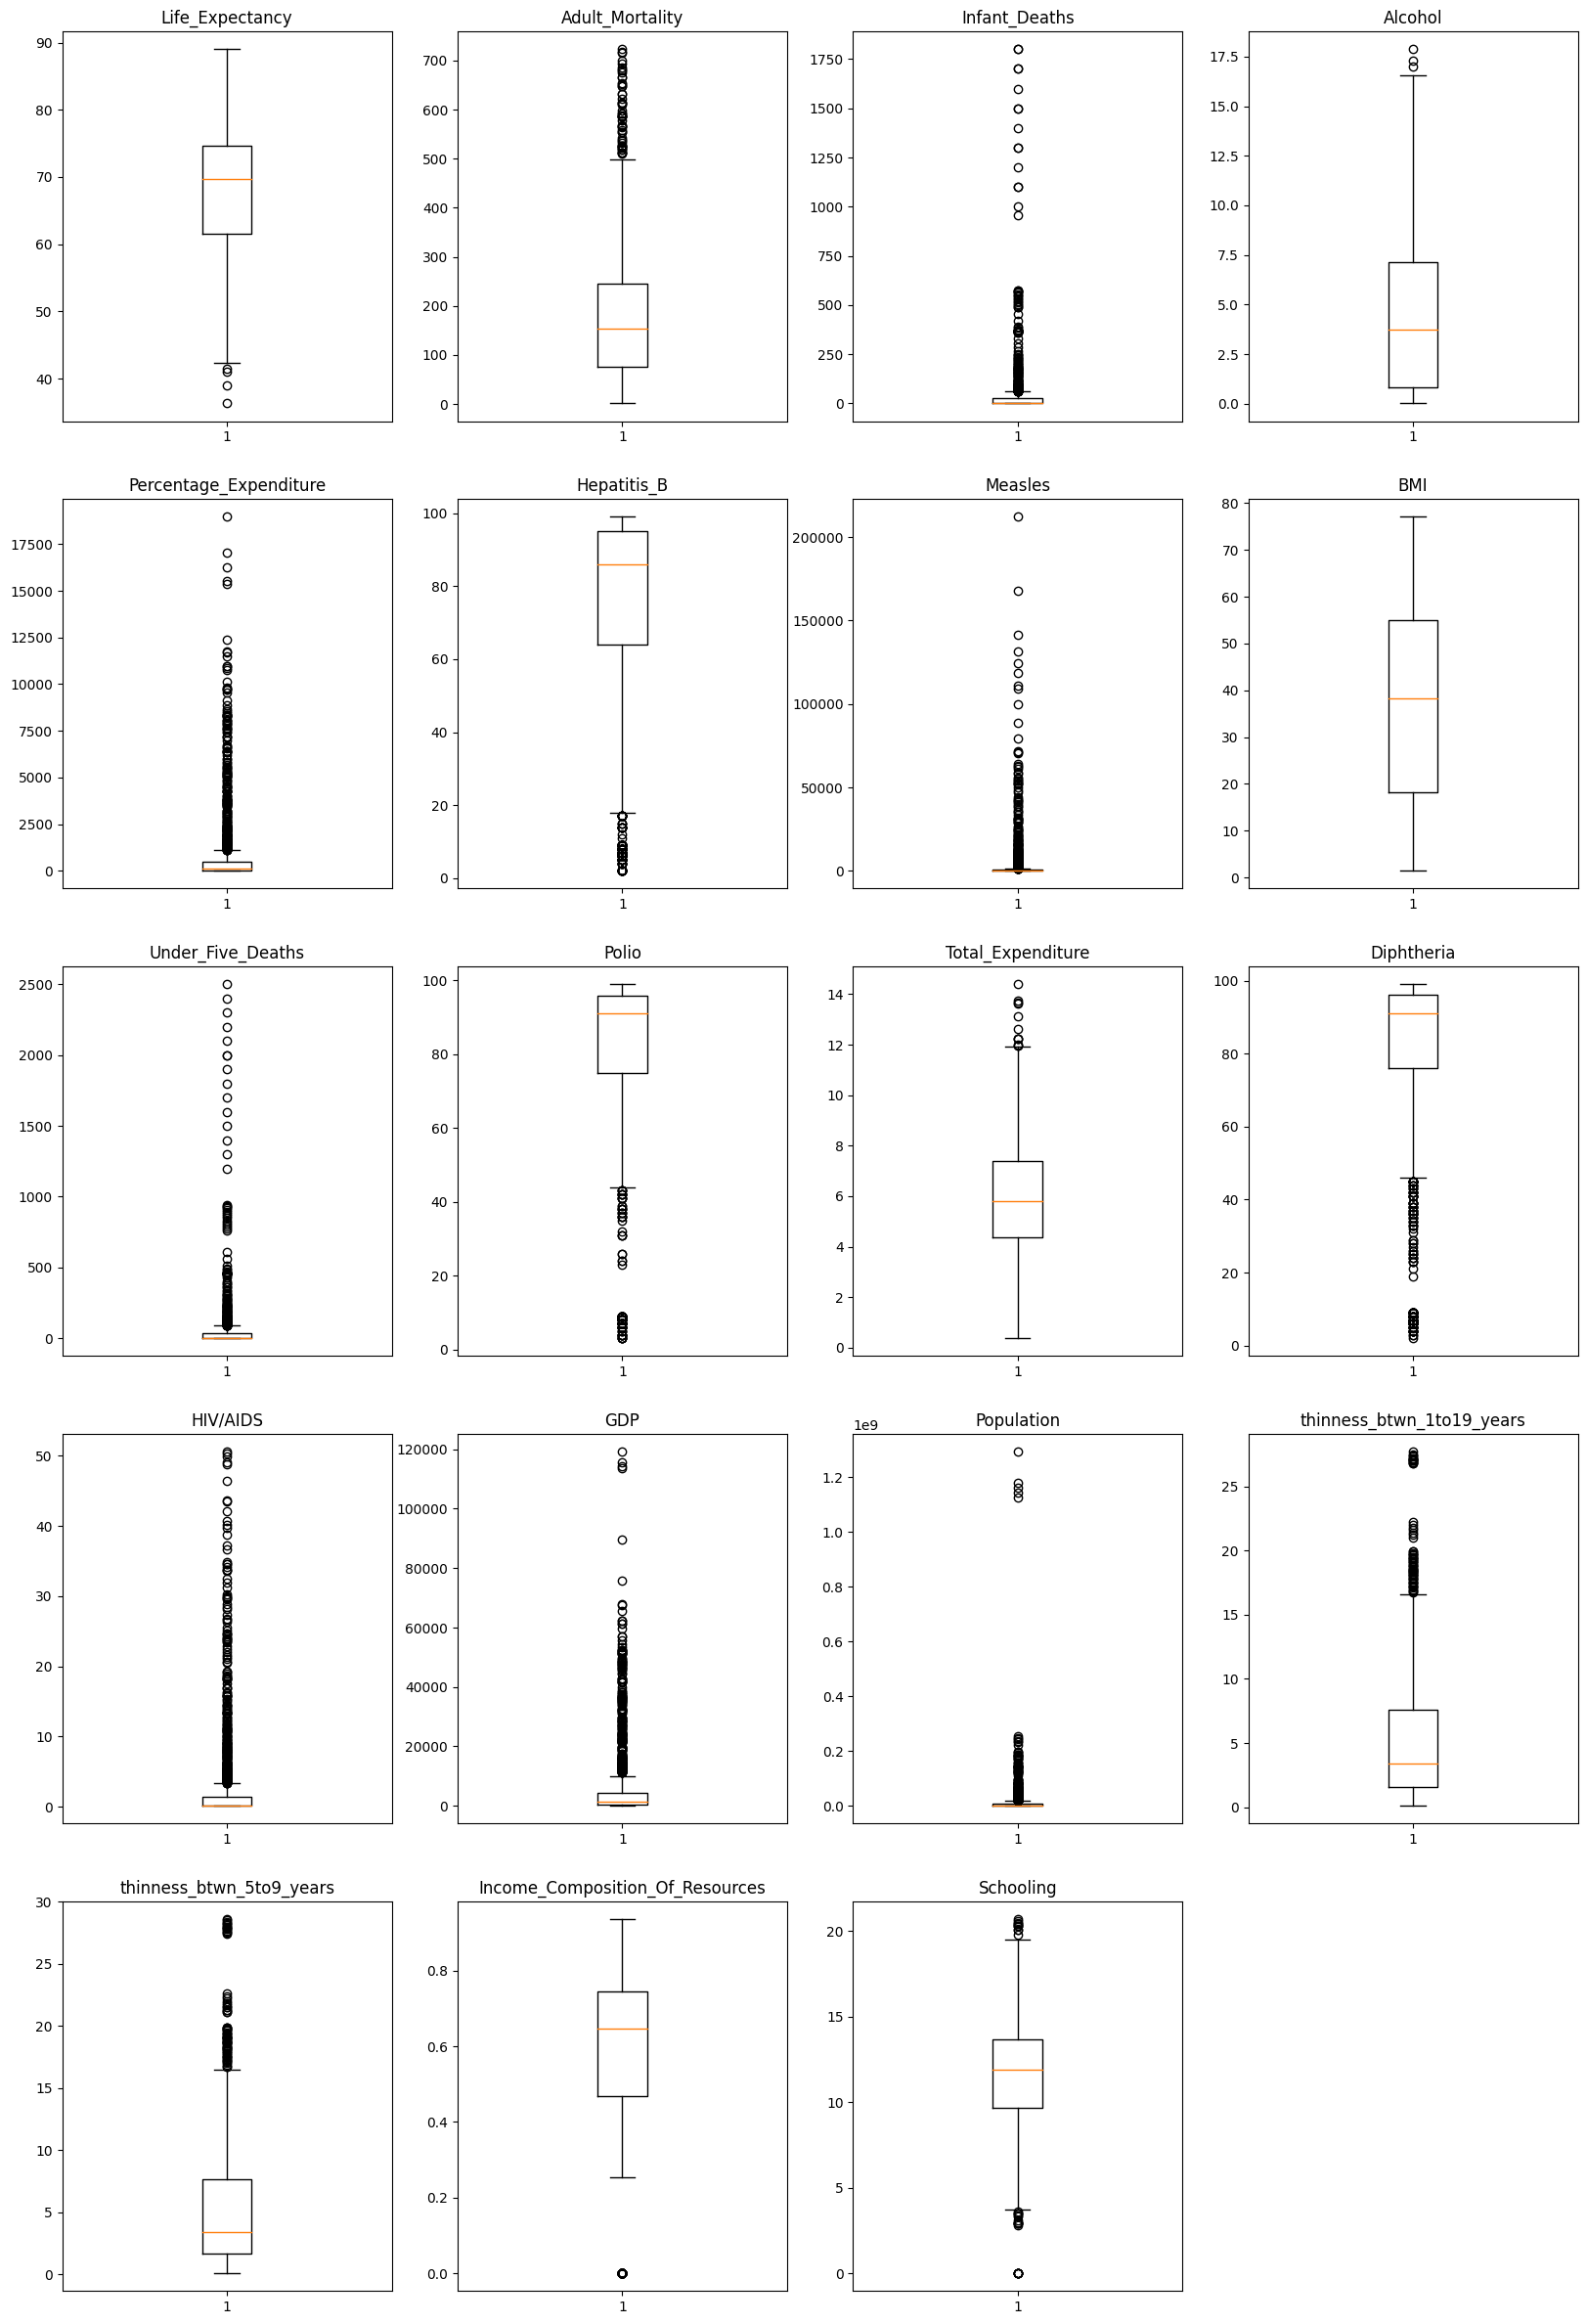

In [ ]:
# Create a dictionary of columns.
column_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,
               'Percentage_Expenditure':5,'Hepatitis_B':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,
               'Polio':10,'Total_Expenditure':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,
               'thinness_btwn_1to19_years':16,'thinness_btwn_5to9_years':17,'Income_Composition_Of_Resources':18,
               'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in column_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

Life_Expectancy - Number of Outliers: 4, Percentage of Outliers: 0.20%

Adult_Mortality - Number of Outliers: 54, Percentage of Outliers: 2.70%

Infant_Deaths - Number of Outliers: 209, Percentage of Outliers: 10.44%

Alcohol - Number of Outliers: 3, Percentage of Outliers: 0.15%

Percentage_Expenditure - Number of Outliers: 234, Percentage of Outliers: 11.69%

Hepatitis_B - Number of Outliers: 217, Percentage of Outliers: 10.84%

Measles - Number of Outliers: 356, Percentage of Outliers: 17.78%

BMI - Number of Outliers: 0, Percentage of Outliers: 0.00%

Under_Five_Deaths - Number of Outliers: 222, Percentage of Outliers: 11.09%

Polio - Number of Outliers: 166, Percentage of Outliers: 8.29%

Total_Expenditure - Number of Outliers: 12, Percentage of Outliers: 0.60%

Diphtheria - Number of Outliers: 203, Percentage of Outliers: 10.14%

HIV/AIDS - Number of Outliers: 309, Percentage of Outliers: 15.43%

GDP - Number of Outliers: 244, Percentage of Outliers: 12.19%

Population - Number o

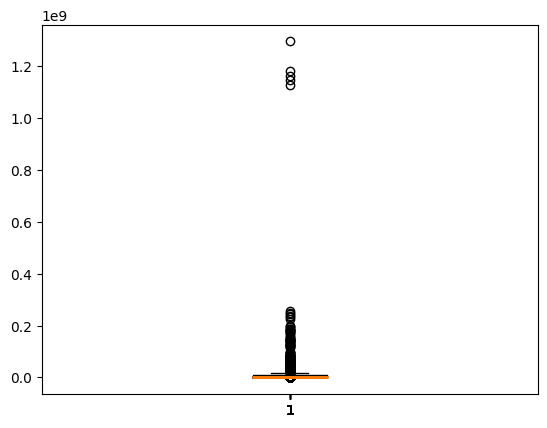

In [ ]:
# Create a dictionary to store outlier information
outlier_info = {}

# Detect outliers in each variable using box plots and calculate statistics
for variable, i in column_dict.items():
    # Get boxplot statistics
    boxplot_stats = plt.boxplot(df[variable], whis=1.5).get('fliers', [])[0]

    # Calculate the number of outliers
    num_outliers = len(boxplot_stats.get_data()[1])

    # Calculate the percentage of outliers
    total_data_points = len(df[variable])
    percentage_outliers = (num_outliers / total_data_points) * 100

    # Store information in the dictionary
    outlier_info[variable] = {'num_outliers': num_outliers, 'percentage_outliers': percentage_outliers}

# Display the outlier information
for variable, info in outlier_info.items():
    print(f"{variable} - Number of Outliers: {info['num_outliers']}, Percentage of Outliers: {info['percentage_outliers']:.2f}%\n")


## Z-Score based filtering


Z-scoring is a statistical method for standardising a variable's distribution. It converts a variable's values to have a mean of 0 and a standard deviation of 1. The z-score formula is as follows:

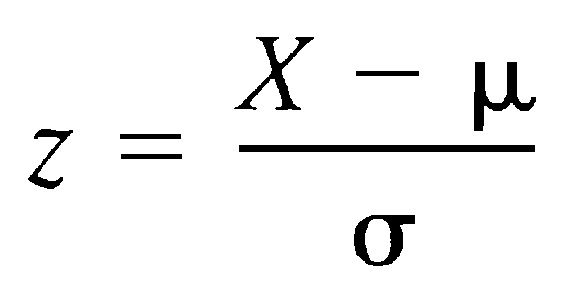


where:
*   X is the original data point
*   μ is the mean of the variable
*   σ is the standard deviation of the variable

Z-score-based filtering is a common technique for removing outliers. This involves determining the Z-score for each data point and eliminating those that exceed a predetermined threshold. The variables will be filtered by using Z-Score below.

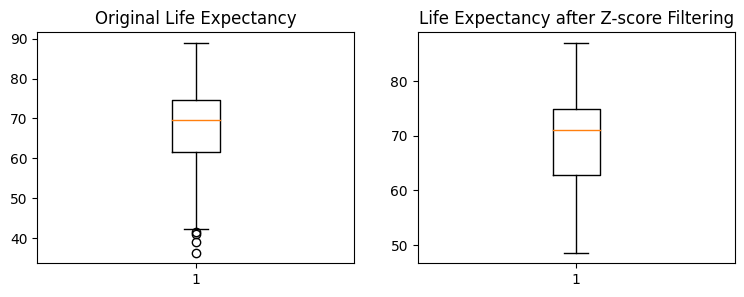

In [ ]:
plt.figure(figsize=(9, 3))

# Original Life Expectancy
plt.subplot(1, 2, 1)
original_variable = df['Life_Expectancy']
plt.boxplot(original_variable)
plt.title("Original Life Expectancy")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 2
filtered_Life_Expectancy = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Life_Expectancy)
plt.title("Life Expectancy after Z-score Filtering")

plt.show()

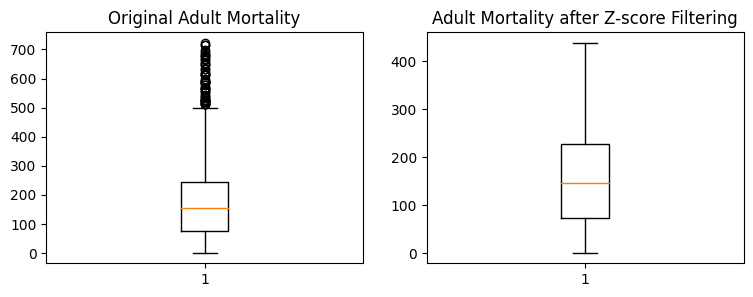

In [ ]:
plt.figure(figsize=(9, 3))

# Original Adult_Mortality
plt.subplot(1, 2, 1)
original_variable = df['Adult_Mortality']
plt.boxplot(original_variable)
plt.title("Original Adult Mortality")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 2
filtered_Adult_Mortality = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Adult_Mortality)
plt.title("Adult Mortality after Z-score Filtering")

plt.show()

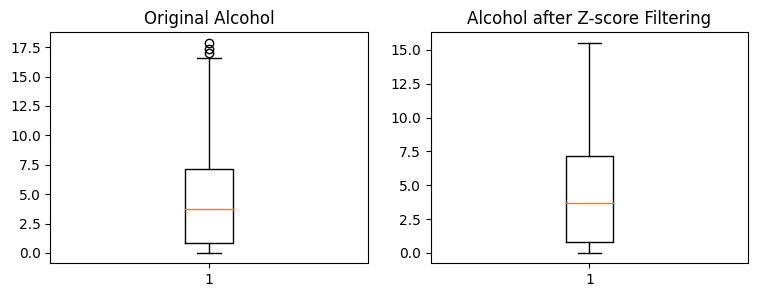

In [ ]:
plt.figure(figsize=(9, 3))

# Original Alcohol
plt.subplot(1, 2, 1)
original_variable = df['Alcohol']
plt.boxplot(original_variable)
plt.title("Original Alcohol")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 3
filtered_Alcohol = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Alcohol)
plt.title("Alcohol after Z-score Filtering")

plt.show()

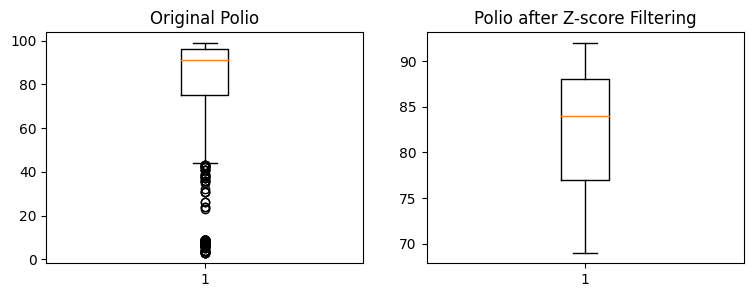

In [ ]:
plt.figure(figsize=(9, 3))

# Original Polio
plt.subplot(1, 2, 1)
original_variable = df['Polio']
plt.boxplot(original_variable)
plt.title("Original Polio")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.5
filtered_Polio = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Polio)
plt.title("Polio after Z-score Filtering")

plt.show()

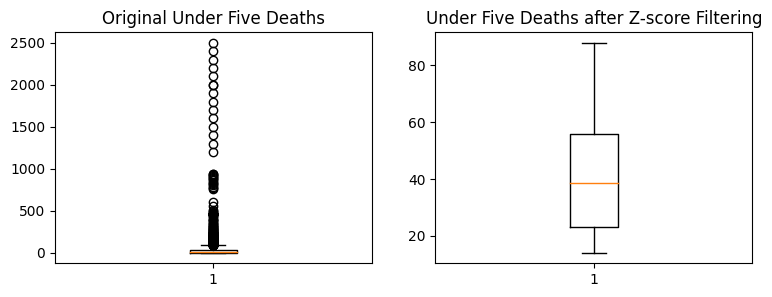

In [ ]:
plt.figure(figsize=(9, 3))

# Original Under Five Deaths
plt.subplot(1, 2, 1)
original_variable = df['Under_Five_Deaths']
plt.boxplot(original_variable)
plt.title("Original Under Five Deaths")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.2
filtered_Under_Five_Deaths = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Under_Five_Deaths)
plt.title("Under Five Deaths after Z-score Filtering")

plt.show()

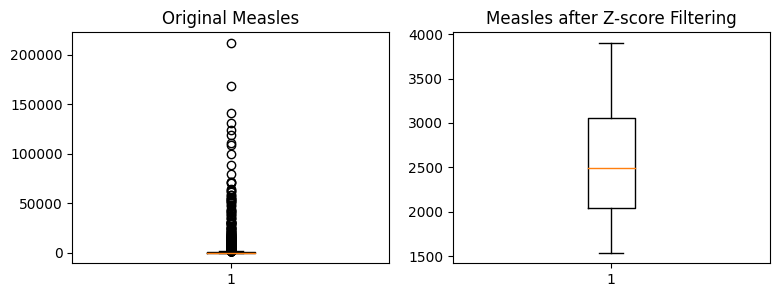

In [ ]:
plt.figure(figsize=(9, 3))

# Original Measles
plt.subplot(1, 2, 1)
original_variable = df['Measles']
plt.boxplot(original_variable)
plt.title("Original Measles")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.1
filtered_Measles = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Measles)
plt.title("Measles after Z-score Filtering")

plt.show()

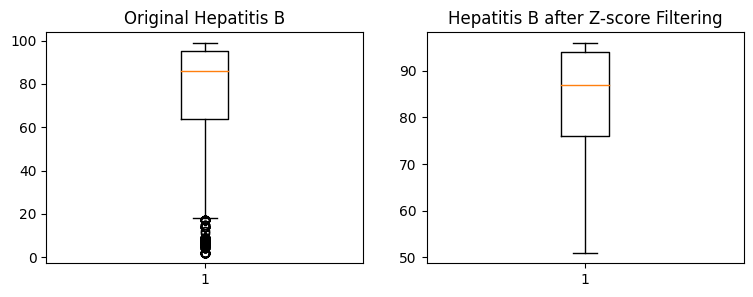

In [ ]:
plt.figure(figsize=(9, 3))

# Original Hepatitis B
plt.subplot(1, 2, 1)
original_variable = df['Hepatitis_B']
plt.boxplot(original_variable)
plt.title("Original Hepatitis B")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.8
filtered_Hepatitis_B = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Hepatitis_B)
plt.title("Hepatitis B after Z-score Filtering")

plt.show()

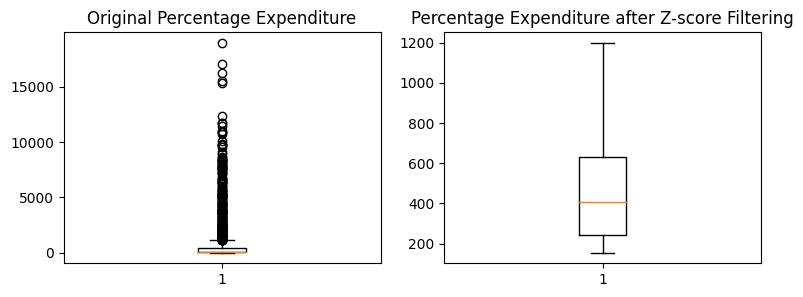

In [ ]:
plt.figure(figsize=(9, 3))

# Original Percentage Expenditure
plt.subplot(1, 2, 1)
original_variable = df['Percentage_Expenditure']
plt.boxplot(original_variable)
plt.title("Original Percentage Expenditure")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.3
filtered_Percentage_Expenditure = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Percentage_Expenditure)
plt.title("Percentage Expenditure after Z-score Filtering")

plt.show()

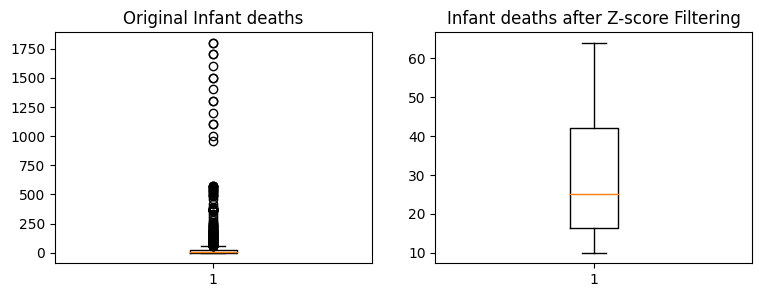

In [ ]:
plt.figure(figsize=(9, 3))

# Original Infant deaths
plt.subplot(1, 2, 1)
original_variable = df['Infant_Deaths']
plt.boxplot(original_variable)
plt.title("Original Infant deaths")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.2
filtered_Infant_Deaths = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Infant_Deaths)
plt.title("Infant deaths after Z-score Filtering")

plt.show()

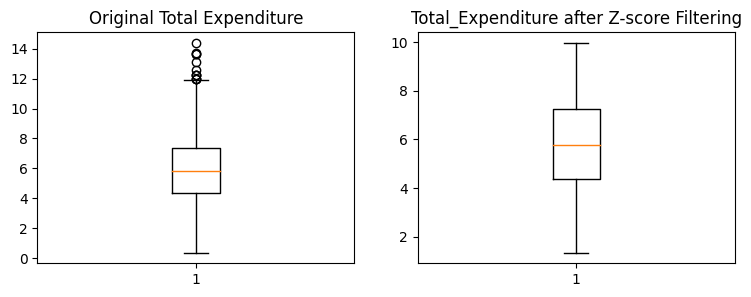

In [ ]:
plt.figure(figsize=(9, 3))

# Original Total Expenditure
plt.subplot(1, 2, 1)
original_variable = df['Total_Expenditure']
plt.boxplot(original_variable)
plt.title("Original Total Expenditure")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 2
filtered_Total_Expenditure = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Total_Expenditure)
plt.title("Total_Expenditure after Z-score Filtering")

plt.show()

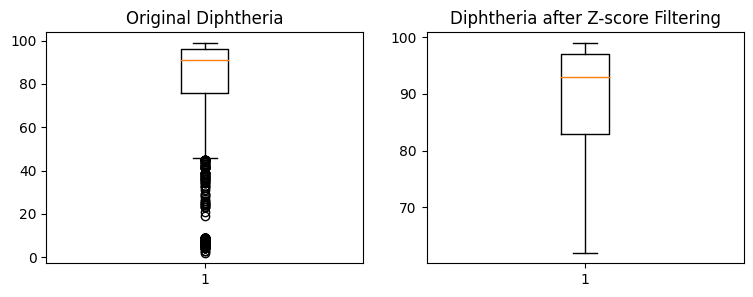

In [ ]:
plt.figure(figsize=(9, 3))

# Original Diphtheria
plt.subplot(1, 2, 1)
original_variable = df['Diphtheria']
plt.boxplot(original_variable)
plt.title("Original Diphtheria")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.8
filtered_Diphtheria = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Diphtheria)
plt.title("Diphtheria after Z-score Filtering")

plt.show()

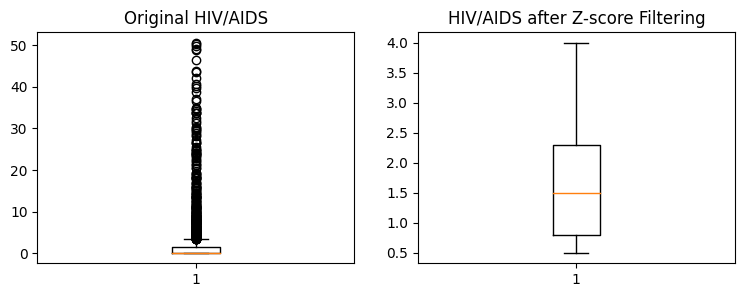

In [ ]:
plt.figure(figsize=(9, 3))

# Original HIV/AIDS
plt.subplot(1, 2, 1)
original_variable = df['HIV/AIDS']
plt.boxplot(original_variable)
plt.title("Original HIV/AIDS")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.3
filtered_HIV_AIDS = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_HIV_AIDS)
plt.title("HIV/AIDS after Z-score Filtering")

plt.show()

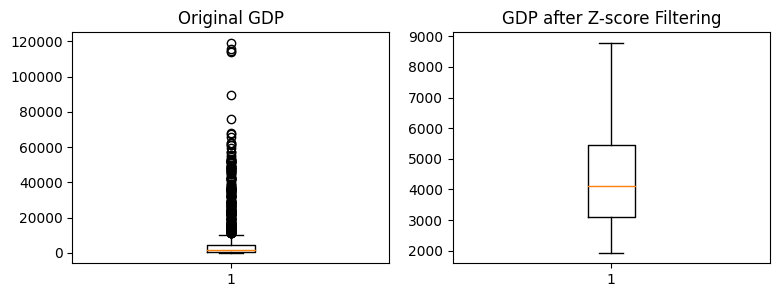

In [ ]:
plt.figure(figsize=(9, 3))

# Original GDP
plt.subplot(1, 2, 1)
original_variable = df['GDP']
plt.boxplot(original_variable)
plt.title("Original GDP")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.3
filtered_GDP = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_GDP)
plt.title("GDP after Z-score Filtering")

plt.show()

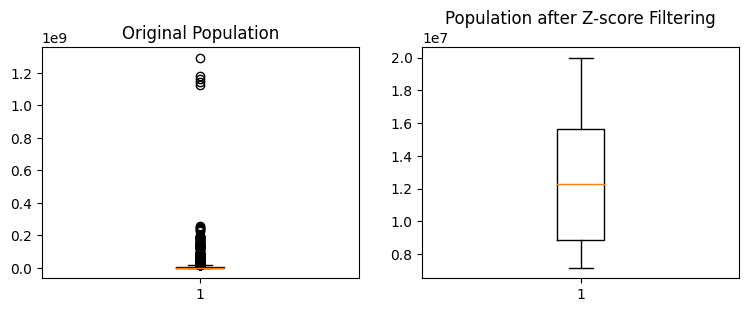

In [ ]:
plt.figure(figsize=(9, 3))

# Original Population
plt.subplot(1, 2, 1)
original_variable = df['Population']
plt.boxplot(original_variable)
plt.title("Original Population")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 0.1
filtered_Population = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Population)
plt.title("Population after Z-score Filtering")

plt.show()

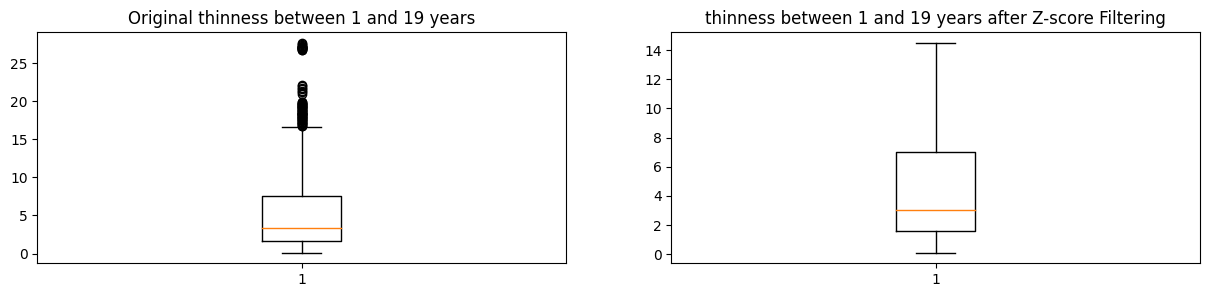

In [ ]:
plt.figure(figsize=(15, 3))

# Original thinness between 1 and 19 years
plt.subplot(1, 2, 1)
original_variable = df['thinness_btwn_1to19_years']
plt.boxplot(original_variable)
plt.title("Original thinness between 1 and 19 years")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 2
filtered_thinness_btwn_1to19_years = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_thinness_btwn_1to19_years)
plt.title("thinness between 1 and 19 years after Z-score Filtering")

plt.show()

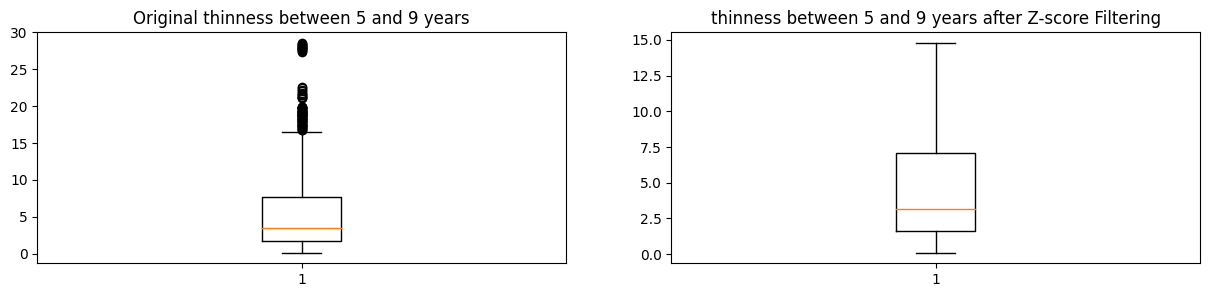

In [ ]:
plt.figure(figsize=(15, 3))

# Original thinness between 5 and 9 years
plt.subplot(1, 2, 1)
original_variable = df['thinness_btwn_5to9_years']
plt.boxplot(original_variable)
plt.title("Original thinness between 5 and 9 years")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 2
filtered_thinness_btwn_5to9_years = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_thinness_btwn_5to9_years)
plt.title("thinness between 5 and 9 years after Z-score Filtering")

plt.show()

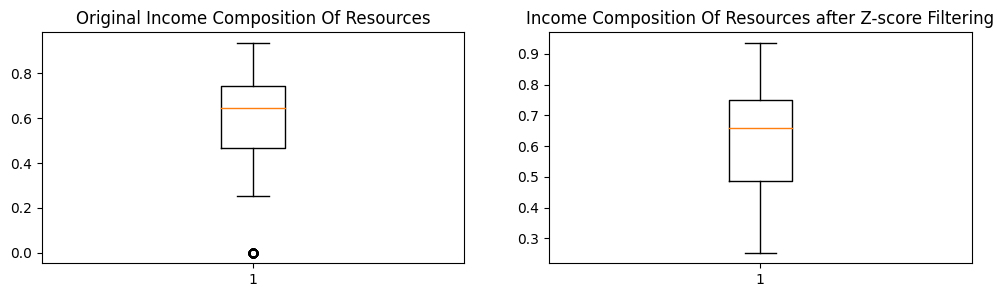

In [ ]:
plt.figure(figsize=(12, 3))

# Original Income Composition Of Resources
plt.subplot(1, 2, 1)
original_variable = df['Income_Composition_Of_Resources']
plt.boxplot(original_variable)
plt.title("Original Income Composition Of Resources")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 2
filtered_Income_Composition_Of_Resources = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_Income_Composition_Of_Resources)
plt.title("Income Composition Of Resources after Z-score Filtering")

plt.show()

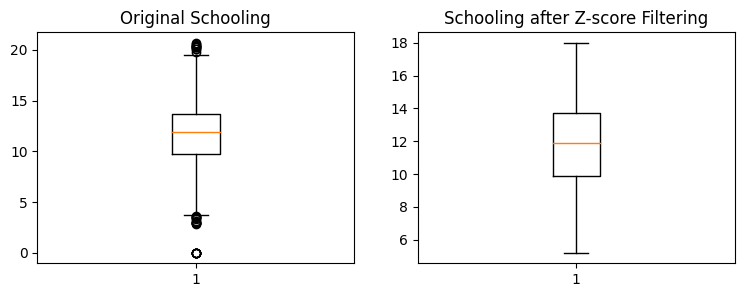

In [ ]:
plt.figure(figsize=(9, 3))

# Original Schooling
plt.subplot(1, 2, 1)
original_variable = df['Schooling']
plt.boxplot(original_variable)
plt.title("Original Schooling")

# Z-score Filtering
plt.subplot(1, 2, 2)
z_scores_variable = zscore(original_variable)
threshold = 2
filtered_schooling = original_variable[abs(z_scores_variable) < threshold]
plt.boxplot(filtered_schooling)
plt.title("Schooling after Z-score Filtering")

plt.show()

 Check number of Outliers after Z-Score filtering for each variable

In [ ]:
z_score_list = [filtered_Life_Expectancy,
filtered_Adult_Mortality,
filtered_Alcohol,
filtered_Polio,
filtered_Under_Five_Deaths,
filtered_Measles,
filtered_Hepatitis_B,
filtered_Percentage_Expenditure,
filtered_Infant_Deaths,
filtered_Total_Expenditure,
filtered_Diphtheria,
filtered_HIV_AIDS,
filtered_GDP,
filtered_Population,
filtered_thinness_btwn_1to19_years,
filtered_thinness_btwn_5to9_years,
filtered_Income_Composition_Of_Resources,
filtered_schooling]

for variable in z_score_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers after Z-score filtering : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0
Number of outliers after Z-score filtering : 0


### Mean-based imputation

Despite the use of interpolation and Z-score filtering in the data preprocessing pipeline, the persistence of NaN values might be attributed to these approaches' inherent limitations. While interpolation is good at guessing missing values, it has limitations when dealing with consecutive NaN values and may not fully handle data inconsistencies. Rather than immediately imputing missing values, Z-score filtering focuses on removing outliers. NaN values may persist if Z-score filtering removes rows containing outliers and missing values. Furthermore, the features of the dataset, the unequal distribution of missing values, and the order in which these algorithms are applied can all contribute to the appearance of NaN values. Hence the mean-based imputation is being used for removing NaN values in our dataframe.

In [ ]:
# Adding z-score filtered variables to the data frame.
df['Z_Score_Life_Expectancy'] = filtered_Life_Expectancy
df['Z_Score_Adult_Mortality'] = filtered_Adult_Mortality
df['Z_Score_Alcohol'] = filtered_Alcohol
df['Z_Score_Polio'] = filtered_Polio
df['Z_Score_Under_Five_Deaths'] = filtered_Under_Five_Deaths
df['Z_Score_Measles'] = filtered_Measles
df['Z_Score_Hepatitis_B'] = filtered_Hepatitis_B
df['Z_Score_Percentage_Expenditure'] = filtered_Percentage_Expenditure
df['Z_Score_Infant_Deaths'] = filtered_Infant_Deaths
df['Z_Score_Total_Expenditure'] = filtered_Total_Expenditure
df['Z_Score_Diphtheria'] = filtered_Diphtheria
df['Z_Score_HIV_AIDS'] = filtered_HIV_AIDS
df['Z_Score_GDP'] = filtered_GDP
df['Z_Score_Population'] = filtered_Population
df['Z_Score_thinness_btwn_1to19_years'] = filtered_thinness_btwn_1to19_years
df['Z_Score_thinness_btwn_5to9_years'] = filtered_thinness_btwn_5to9_years
df['Z_Score_Income_Composition_Of_Resources'] = filtered_Income_Composition_Of_Resources
df['Z_Score_schooling'] = filtered_schooling

In [ ]:
# Checking how many z-score filtered variables has NaN values
nan_values_original = df.isna().sum()
print("NaN values in DataFrame:")
print(nan_values_original)

NaN values in DataFrame:
Country                                       0
Year                                          0
Status                                        0
Life_Expectancy                               0
Adult_Mortality                               0
Infant_Deaths                                 0
Alcohol                                       0
Percentage_Expenditure                        0
Hepatitis_B                                   0
Measles                                       0
BMI                                           0
Under_Five_Deaths                             0
Polio                                         0
Total_Expenditure                             0
Diphtheria                                    0
HIV/AIDS                                      0
GDP                                           0
Population                                    0
thinness_btwn_1to19_years                     0
thinness_btwn_5to9_years                      0
Income_Composit

In [ ]:
# Replace NaN values with mean in the specified columns
columns_to_fill = ['Z_Score_Life_Expectancy', 'Z_Score_Adult_Mortality', 'Z_Score_Alcohol', 'Z_Score_Polio',
                   'Z_Score_Under_Five_Deaths', 'Z_Score_Measles', 'Z_Score_Hepatitis_B',
                   'Z_Score_Percentage_Expenditure', 'Z_Score_Infant_Deaths', 'Z_Score_Total_Expenditure',
                   'Z_Score_Diphtheria', 'Z_Score_HIV_AIDS', 'Z_Score_GDP', 'Z_Score_Population',
                   'Z_Score_thinness_btwn_1to19_years', 'Z_Score_thinness_btwn_5to9_years',
                   'Z_Score_Income_Composition_Of_Resources', 'Z_Score_schooling']

df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

# Check for NaN values after replacement
nan_values_after_fill = df.isna().sum()
print("NaN values in DataFrame after imputation:")
print(nan_values_after_fill)

NaN values in DataFrame after imputation:
Country                                    0
Year                                       0
Status                                     0
Life_Expectancy                            0
Adult_Mortality                            0
Infant_Deaths                              0
Alcohol                                    0
Percentage_Expenditure                     0
Hepatitis_B                                0
Measles                                    0
BMI                                        0
Under_Five_Deaths                          0
Polio                                      0
Total_Expenditure                          0
Diphtheria                                 0
HIV/AIDS                                   0
GDP                                        0
Population                                 0
thinness_btwn_1to19_years                  0
thinness_btwn_5to9_years                   0
Income_Composition_Of_Resources            0
Schooling    

# Statistical Analysis and Data Visualisations

The statistical analysis covers important variables in the dataset, providing a comprehensive statistical summary that includes measures of central tendency and measures of spread. Histograms visually illustrate the distribution of values for each variable, providing insights on central tendency (mean or median) and spread (variance or standard deviation).

Data visualisation is the use of graphics to depict information and data in order to discover insights, patterns, and trends. It converts complex datasets into visual elements such as charts, graphs, and maps, making it easier for people to understand and analyse the data's underlying patterns.


In [ ]:
# Measures of central tendency and spread for numerical variables
central_tendency_spread = df.describe()

# Display measures of central tendency and spread
print("Measures of Central Tendency and Spread:")
print(central_tendency_spread)

Measures of Central Tendency and Spread:
              Year  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
count  2002.000000      2002.000000      2002.000000    2002.000000   
mean   2006.985015        67.934515       175.682817      36.836663   
std       4.323127         9.687093       131.351160     138.285933   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2003.000000        61.600000        76.000000       1.000000   
50%    2007.000000        69.700000       154.000000       4.000000   
75%    2011.000000        74.700000       245.750000      25.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage_Expenditure  Hepatitis_B        Measles  \
count  2002.000000             2002.000000  2002.000000    2002.000000   
mean      4.433184              681.137069    73.714286    2732.158841   
std       3.970748             1755.784645    29.110300   12059.705937   
min       0.010000     

In [ ]:
headers = df.columns

# Print the column headers
for header in headers:
    print(header)

Country
Year
Status
Life_Expectancy
Adult_Mortality
Infant_Deaths
Alcohol
Percentage_Expenditure
Hepatitis_B
Measles
BMI
Under_Five_Deaths
Polio
Total_Expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness_btwn_1to19_years
thinness_btwn_5to9_years
Income_Composition_Of_Resources
Schooling
Z_Score_Life_Expectancy
Z_Score_Adult_Mortality
Z_Score_Alcohol
Z_Score_Polio
Z_Score_Under_Five_Deaths
Z_Score_Measles
Z_Score_Hepatitis_B
Z_Score_Percentage_Expenditure
Z_Score_Infant_Deaths
Z_Score_Total_Expenditure
Z_Score_Diphtheria
Z_Score_HIV_AIDS
Z_Score_GDP
Z_Score_Population
Z_Score_thinness_btwn_1to19_years
Z_Score_thinness_btwn_5to9_years
Z_Score_Income_Composition_Of_Resources
Z_Score_schooling


The code below arranges the numerical variables into a hierarchical pattern, with each subplot dedicated to a different variable. Histograms depict the frequency distribution of values for each variable, providing insights into the data's central tendency, spread, and probable patterns.

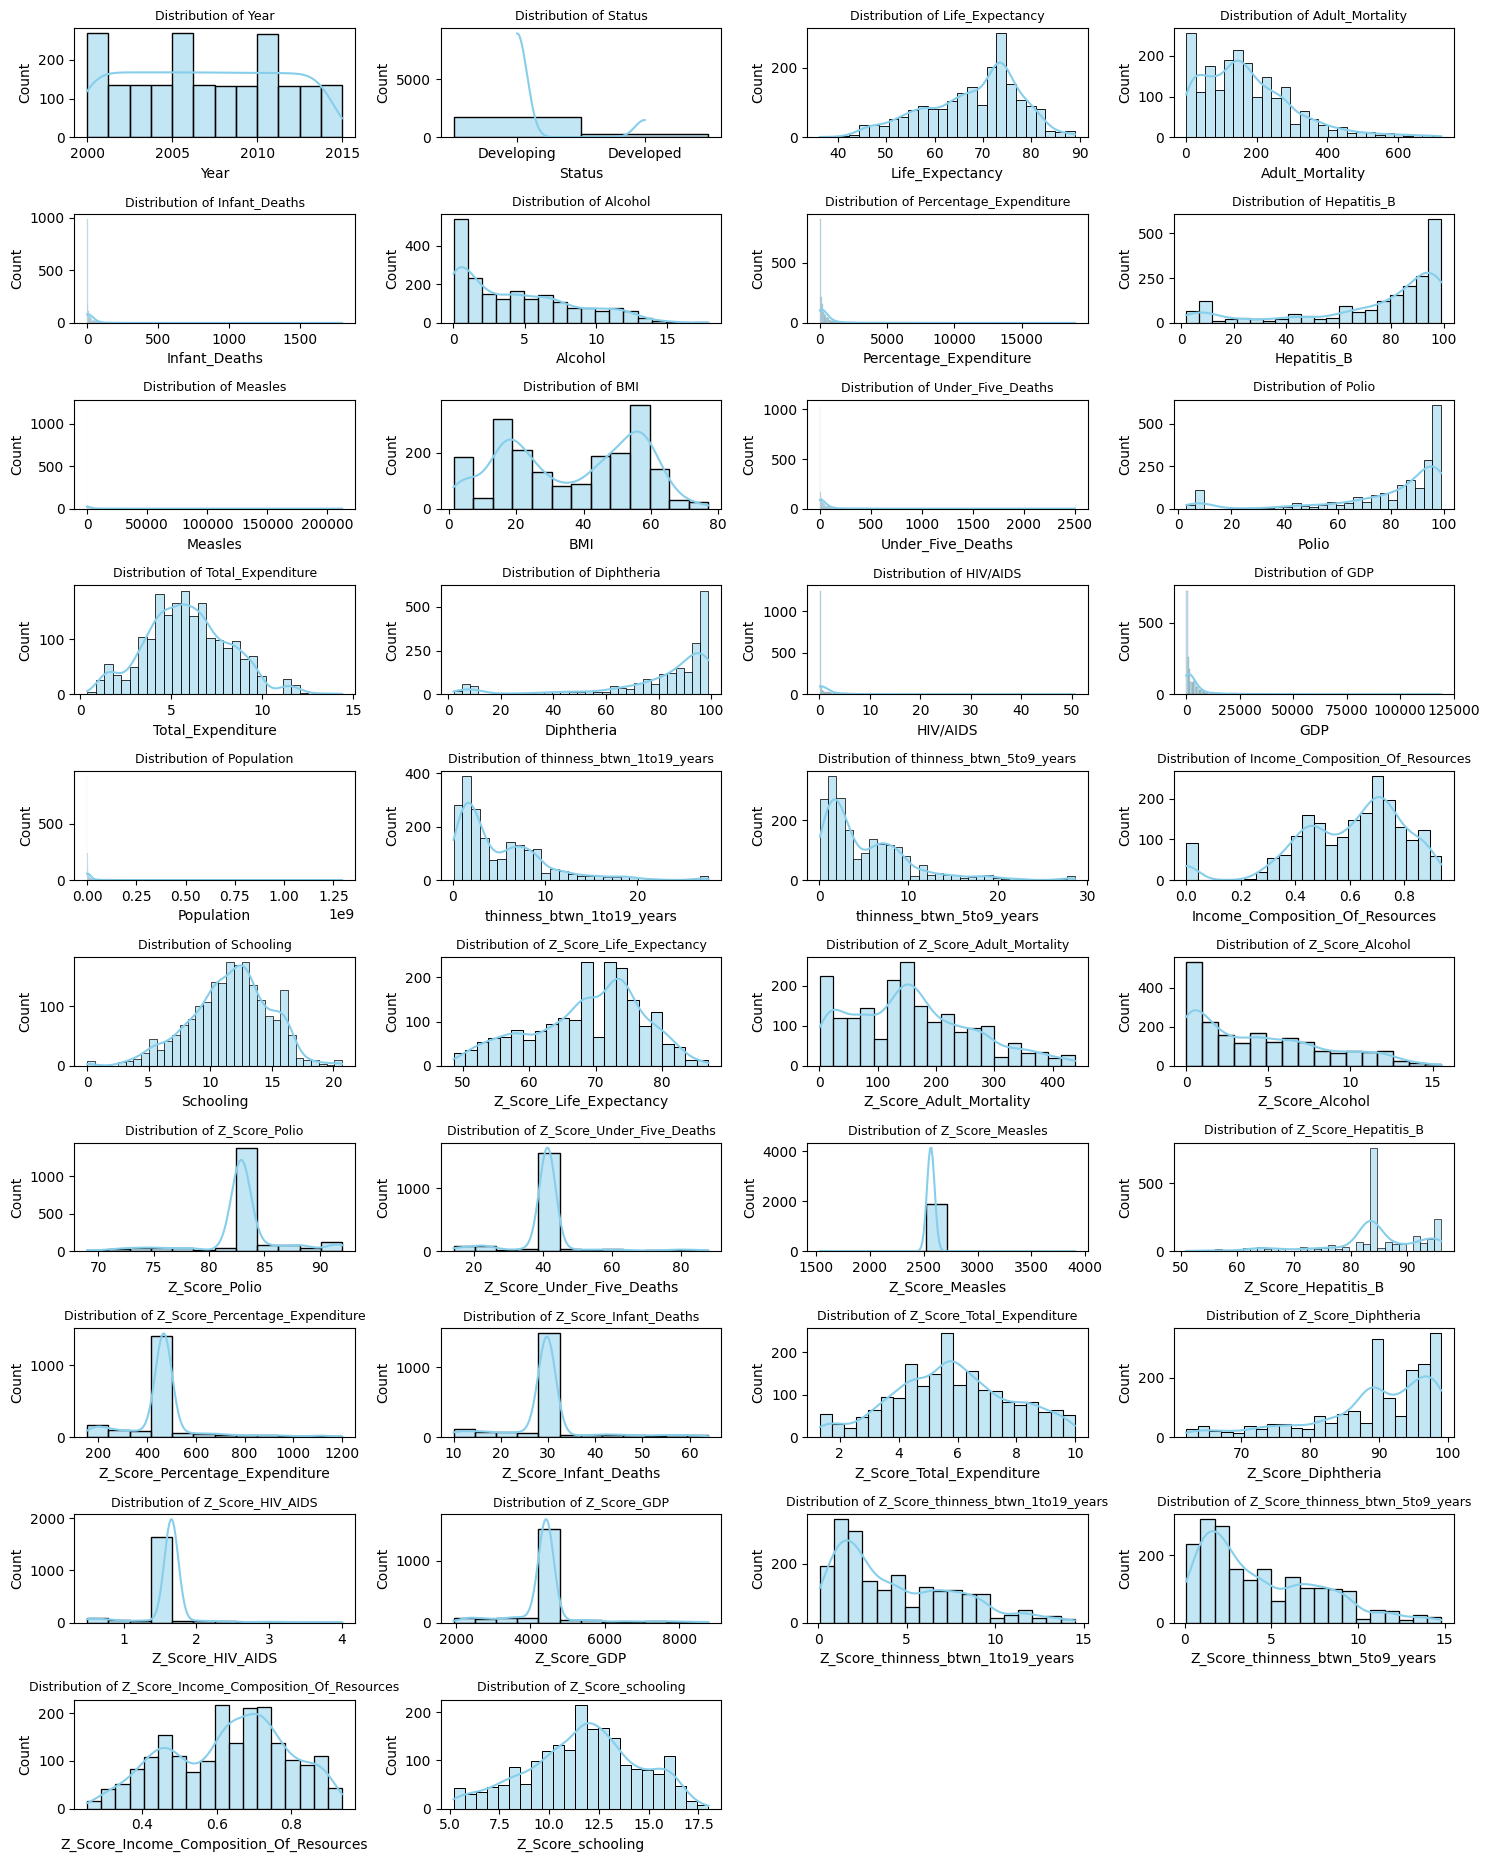

In [ ]:
# Distribution of each numerical variable.
all_columns = ['Year',
'Status',
'Life_Expectancy',
'Adult_Mortality',
'Infant_Deaths',
'Alcohol',
'Percentage_Expenditure',
'Hepatitis_B',
'Measles',
'BMI',
'Under_Five_Deaths',
'Polio',
'Total_Expenditure',
'Diphtheria',
'HIV/AIDS',
'GDP',
'Population',
'thinness_btwn_1to19_years',
'thinness_btwn_5to9_years',
'Income_Composition_Of_Resources',
'Schooling',
'Z_Score_Life_Expectancy',
'Z_Score_Adult_Mortality',
'Z_Score_Alcohol',
'Z_Score_Polio',
'Z_Score_Under_Five_Deaths',
'Z_Score_Measles',
'Z_Score_Hepatitis_B',
'Z_Score_Percentage_Expenditure',
'Z_Score_Infant_Deaths',
'Z_Score_Total_Expenditure',
'Z_Score_Diphtheria',
'Z_Score_HIV_AIDS',
'Z_Score_GDP',
'Z_Score_thinness_btwn_1to19_years',
'Z_Score_thinness_btwn_5to9_years',
'Z_Score_Income_Composition_Of_Resources',
'Z_Score_schooling']

num_rows = len(all_columns) // 2 + len(all_columns) % 2

# Distribution of each numerical variable
plt.figure(figsize=(15, 35))
for i, column in enumerate(all_columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Categorical variable descriptive statistics
categorical_stats = df.describe(include=['O'])

# Display categorical variable descriptive statistics
print("\nCategorical Variable Descriptive Statistics:")
print(categorical_stats)


Categorical Variable Descriptive Statistics:
            Country      Status
count          2002        2002
unique          134           2
top     Afghanistan  Developing
freq             16        1717


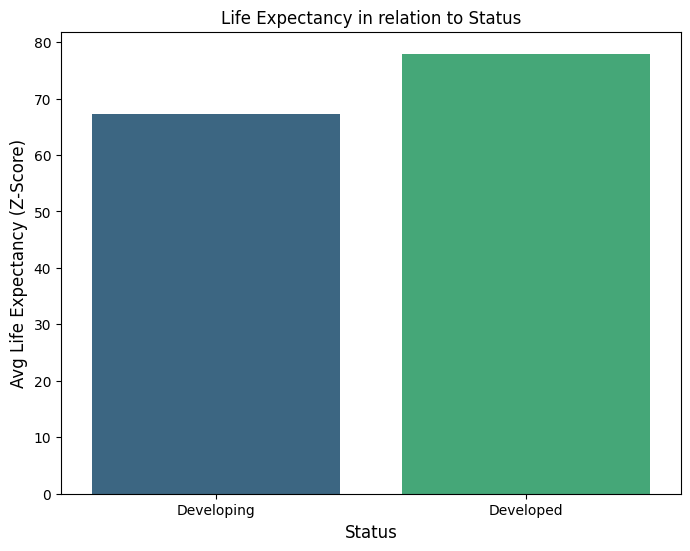

In [ ]:
# Life_Expectancy in relation to Status using bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Z_Score_Life_Expectancy', data=df, errorbar=None, palette='viridis')
plt.xlabel("Status", fontsize=12)
plt.ylabel("Avg Life Expectancy (Z-Score)", fontsize=12)
plt.title("Life Expectancy in relation to Status")
plt.show()

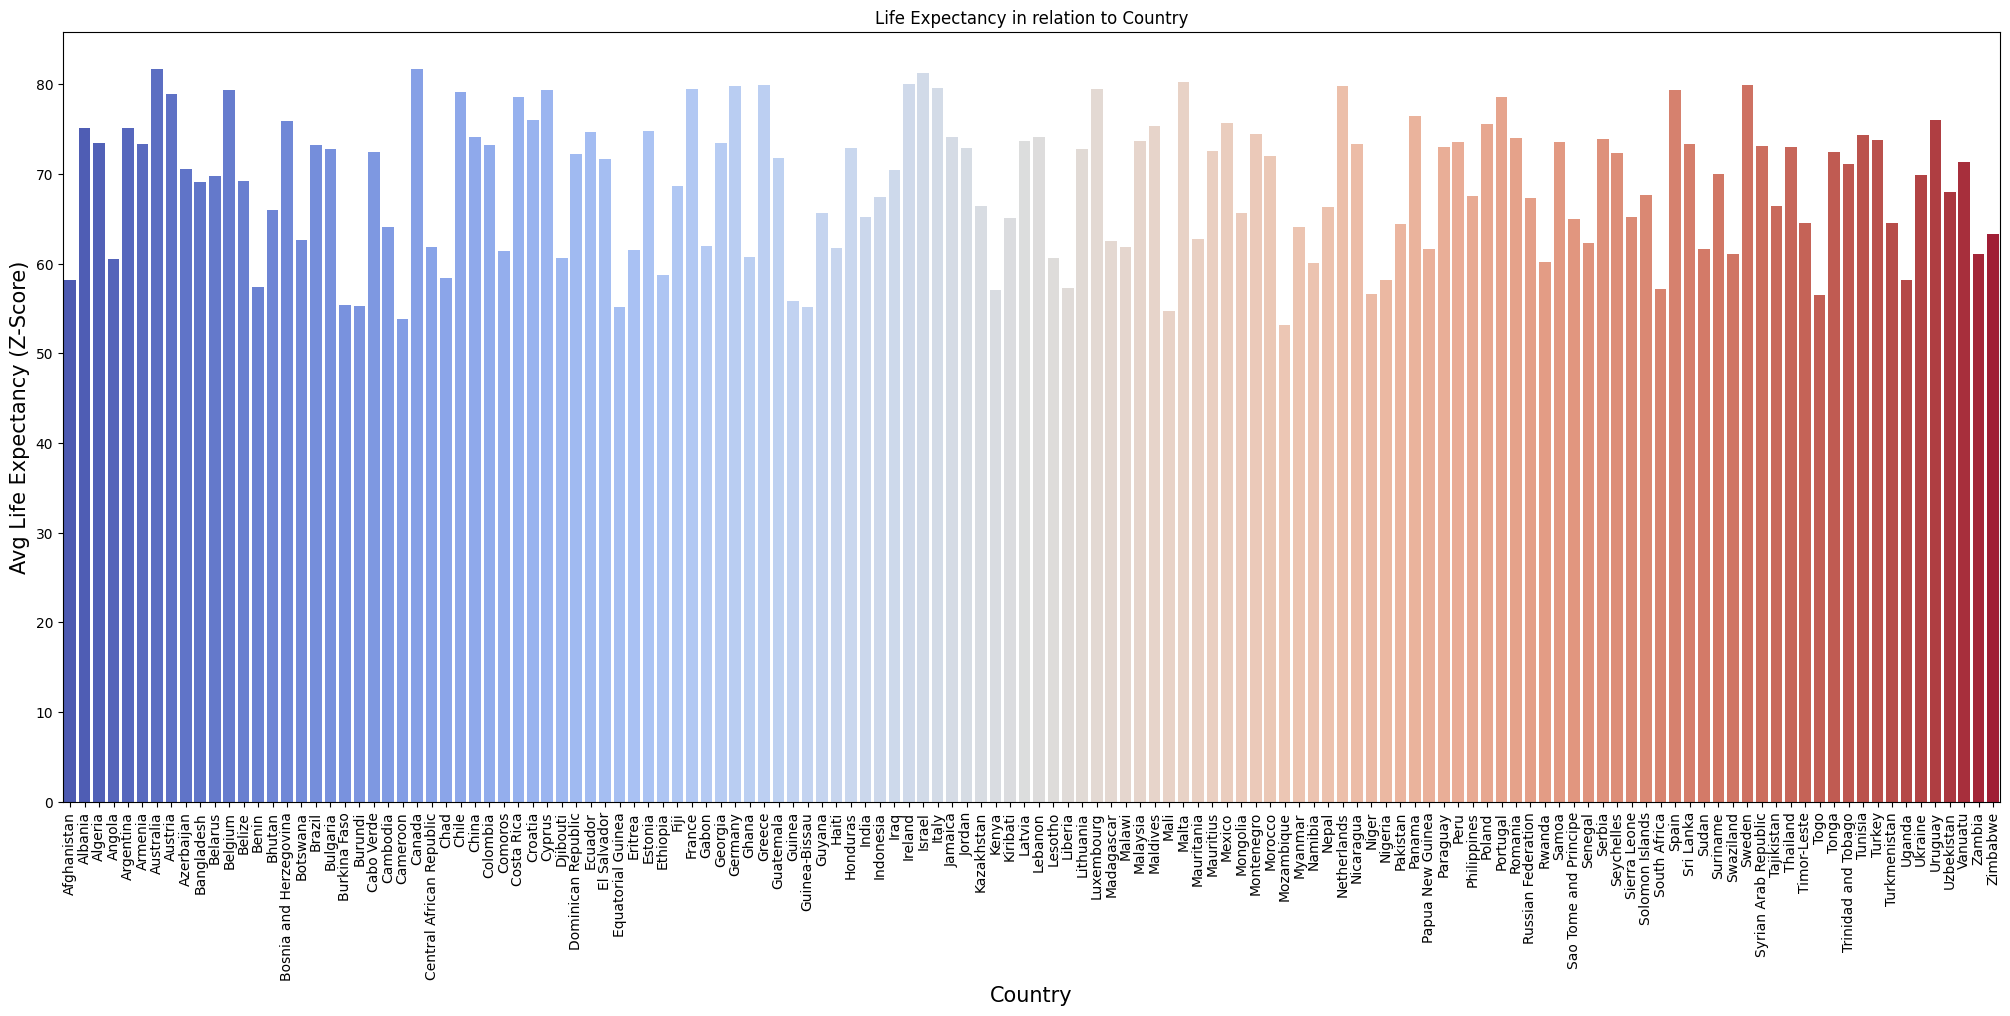

In [ ]:
# Life_Expectancy in relation to Country using bar plot
plt.figure(figsize=(25, 10))
sns.barplot(x='Country', y='Z_Score_Life_Expectancy', data=df, errorbar=None, palette='coolwarm')
plt.xlabel("Country", fontsize=15)
plt.ylabel("Avg Life Expectancy (Z-Score)", fontsize=15)
plt.title("Life Expectancy in relation to Country")
plt.xticks(rotation=90)
plt.show()

The bar plot visualisation below show the average life expectancy throughout various years. The data is collected from a DataFrame, and the mean and standard deviation for life expectancy in each year are determined. Error bars are used to depict the variability around the mean, revealing the data's confidence intervals. A red dashed line is also introduced to highlight a specific year of significance. The resulting graphic depicts life expectancy trends over time, including a visual depiction of the uncertainty associated with each data point.

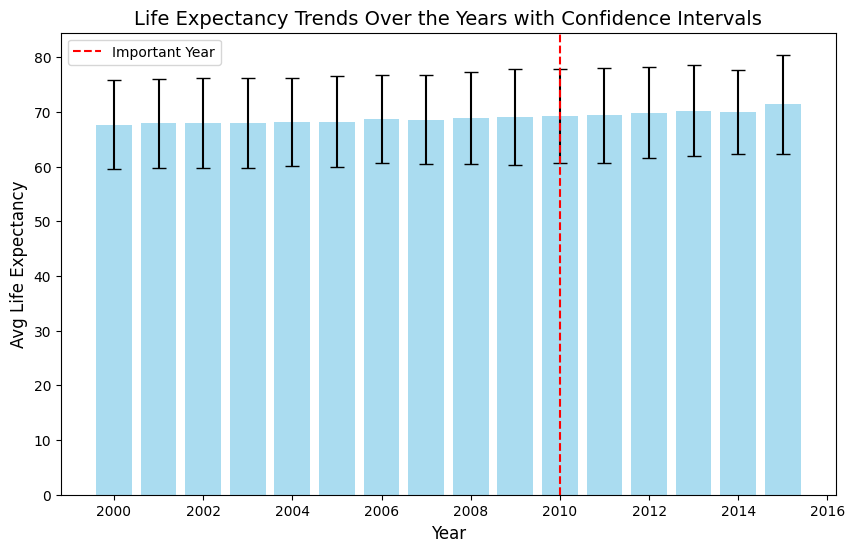

In [ ]:
# Calculate the mean and standard deviation for each year
mean_life_expectancy = df.groupby('Year')['Z_Score_Life_Expectancy'].mean()
std_life_expectancy = df.groupby('Year')['Z_Score_Life_Expectancy'].std()

# Create a bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(mean_life_expectancy.index, mean_life_expectancy, yerr=std_life_expectancy, color='skyblue', capsize=5, alpha=0.7)

# Highlight important years
plt.axvline(x=2010, color='red', linestyle='--', label='Important Year')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Avg Life Expectancy", fontsize=12)
plt.title("Life Expectancy Trends Over the Years with Confidence Intervals", fontsize=14)

plt.legend()
plt.show()

A number of scatter plots are used in this statistical analysis to investigate the correlations between life expectancy and other key factors. Adult mortality, infant mortality, alcohol consumption, percentage expenditure, hepatitis B vaccination coverage, under-five deaths, polio vaccination coverage, total expenditure on health, diphtheria vaccination coverage, HIV/AIDS prevalence, GDP, population, thinness between 1 and 19 years, thinness between 5 and 9 years, income composition of resources, and schooling are all represented by subplots. The scatter plots depict the probable relationships and patterns between these parameters and life expectancy.

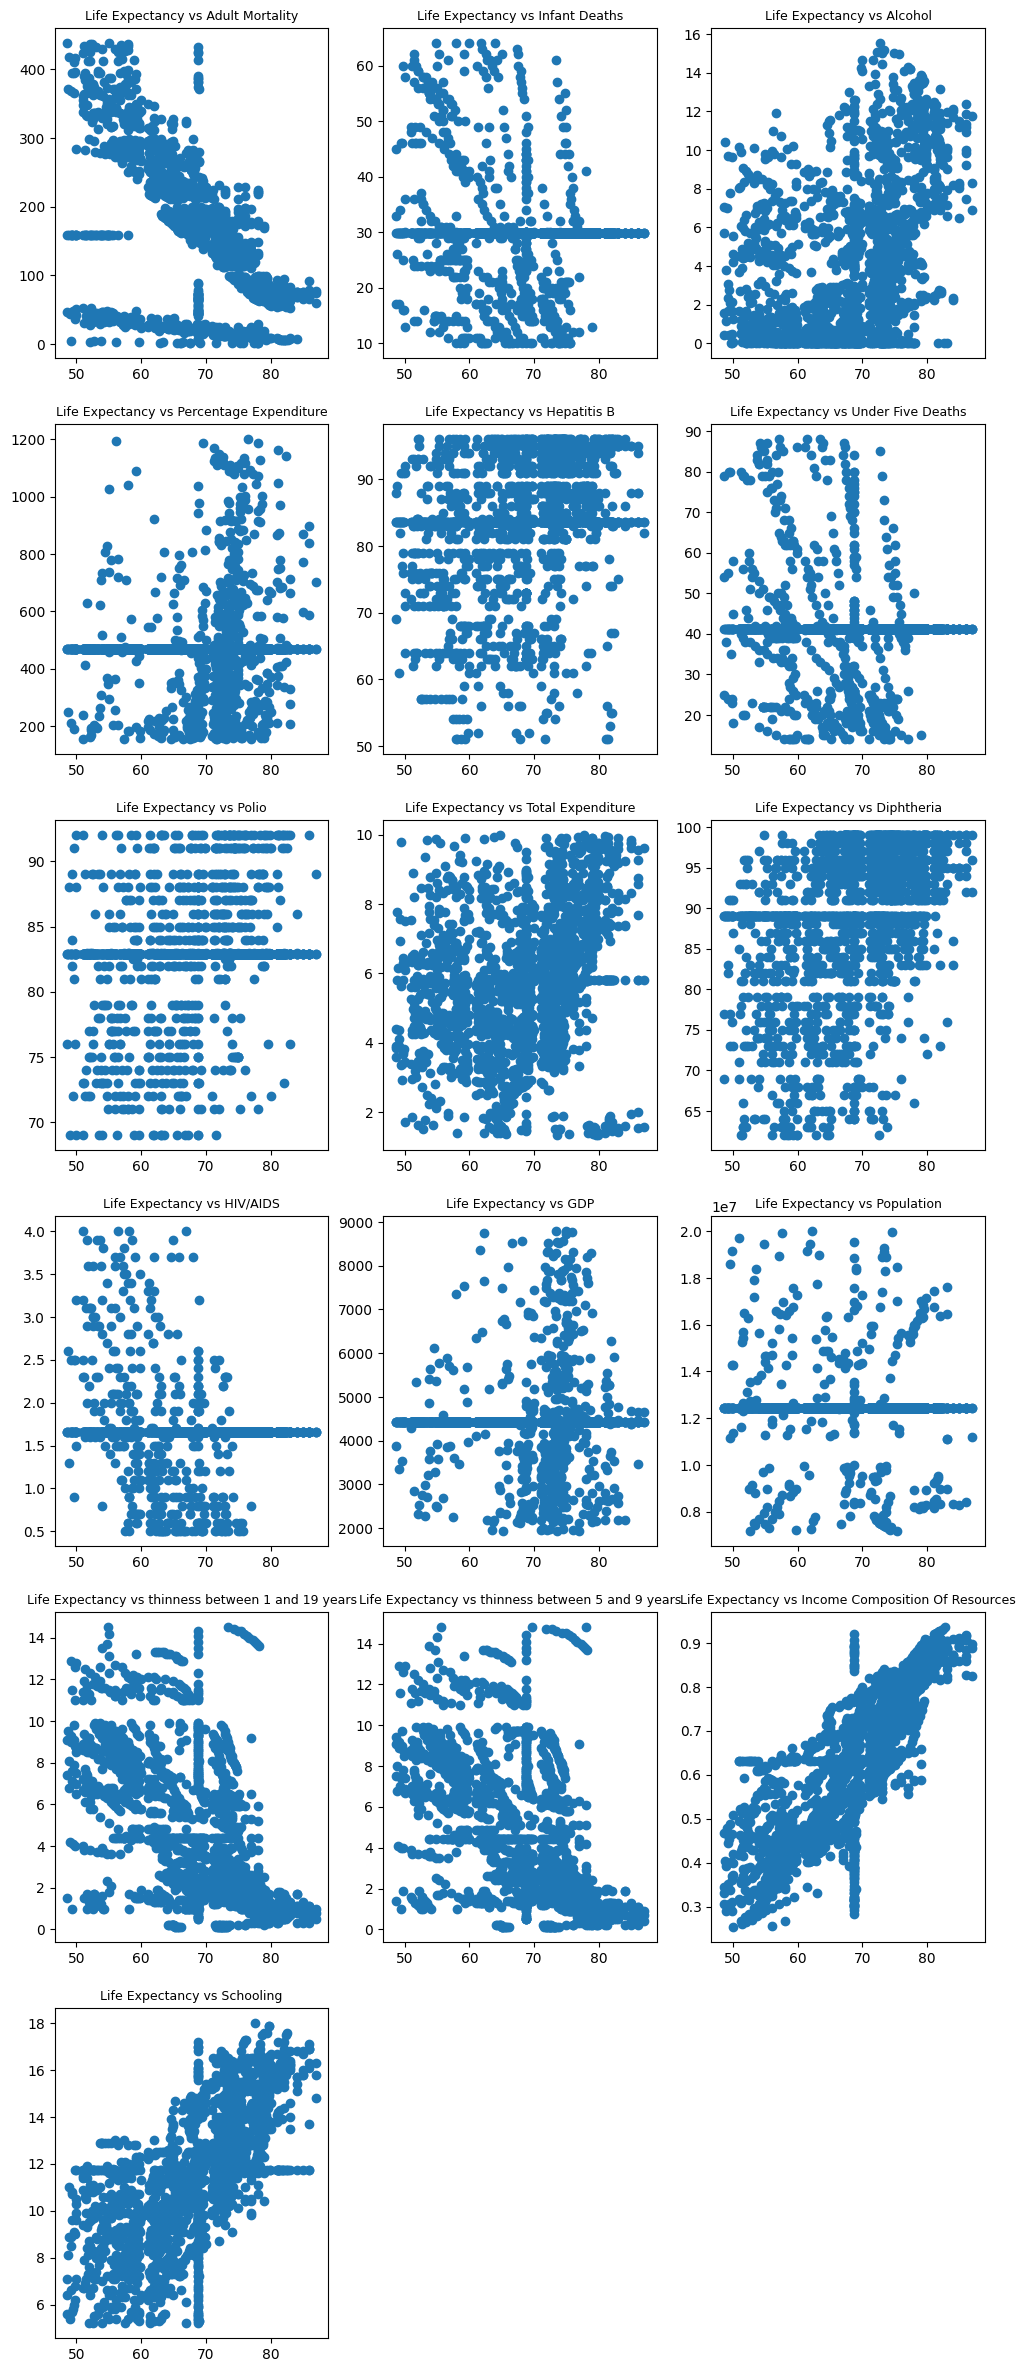

In [ ]:
# Scatter plot between the target variable(Z_Score_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(12,30))

plt.subplot(6,3,1)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Adult_Mortality"])
plt.title("Life Expectancy vs Adult Mortality", fontsize=9)

plt.subplot(6,3,2)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Infant_Deaths"])
plt.title("Life Expectancy vs Infant Deaths", fontsize=9)

plt.subplot(6,3,3)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Alcohol"])
plt.title("Life Expectancy vs Alcohol", fontsize=9)

plt.subplot(6,3,4)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Percentage_Expenditure"])
plt.title("Life Expectancy vs Percentage Expenditure", fontsize=9)

plt.subplot(6,3,5)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Hepatitis_B"])
plt.title("Life Expectancy vs Hepatitis B", fontsize=9)

plt.subplot(6,3,6)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Under_Five_Deaths"])
plt.title("Life Expectancy vs Under Five Deaths", fontsize=9)

plt.subplot(6,3,7)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Polio"])
plt.title("Life Expectancy vs Polio", fontsize=9)

plt.subplot(6,3,8)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Total_Expenditure"])
plt.title("Life Expectancy vs Total Expenditure", fontsize=9)

plt.subplot(6,3,9)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Diphtheria"])
plt.title("Life Expectancy vs Diphtheria", fontsize=9)

plt.subplot(6,3,10)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_HIV_AIDS"])
plt.title("Life Expectancy vs HIV/AIDS", fontsize=9)

plt.subplot(6,3,11)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_GDP"])
plt.title("Life Expectancy vs GDP", fontsize=9)

plt.subplot(6,3,12)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Population"])
plt.title("Life Expectancy vs Population", fontsize=9)

plt.subplot(6,3,13)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_thinness_btwn_1to19_years"])
plt.title("Life Expectancy vs thinness between 1 and 19 years", fontsize=9)

plt.subplot(6,3,14)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_thinness_btwn_5to9_years"])
plt.title("Life Expectancy vs thinness between 5 and 9 years", fontsize=9)

plt.subplot(6,3,15)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_Income_Composition_Of_Resources"])
plt.title("Life Expectancy vs Income Composition Of Resources", fontsize=9)

plt.subplot(6,3,16)
plt.scatter(df["Z_Score_Life_Expectancy"], df["Z_Score_schooling"])
plt.title("Life Expectancy vs Schooling", fontsize=9)


plt.show()

### Observation
Adult Mortality has a relatively negative association with Life Expectancy.
Life expectancy is positively related to income composition of resources and education.

Let's see whether there's any relationship between the variables that are related to the target variable (Z_Score_Life_Expectancy).

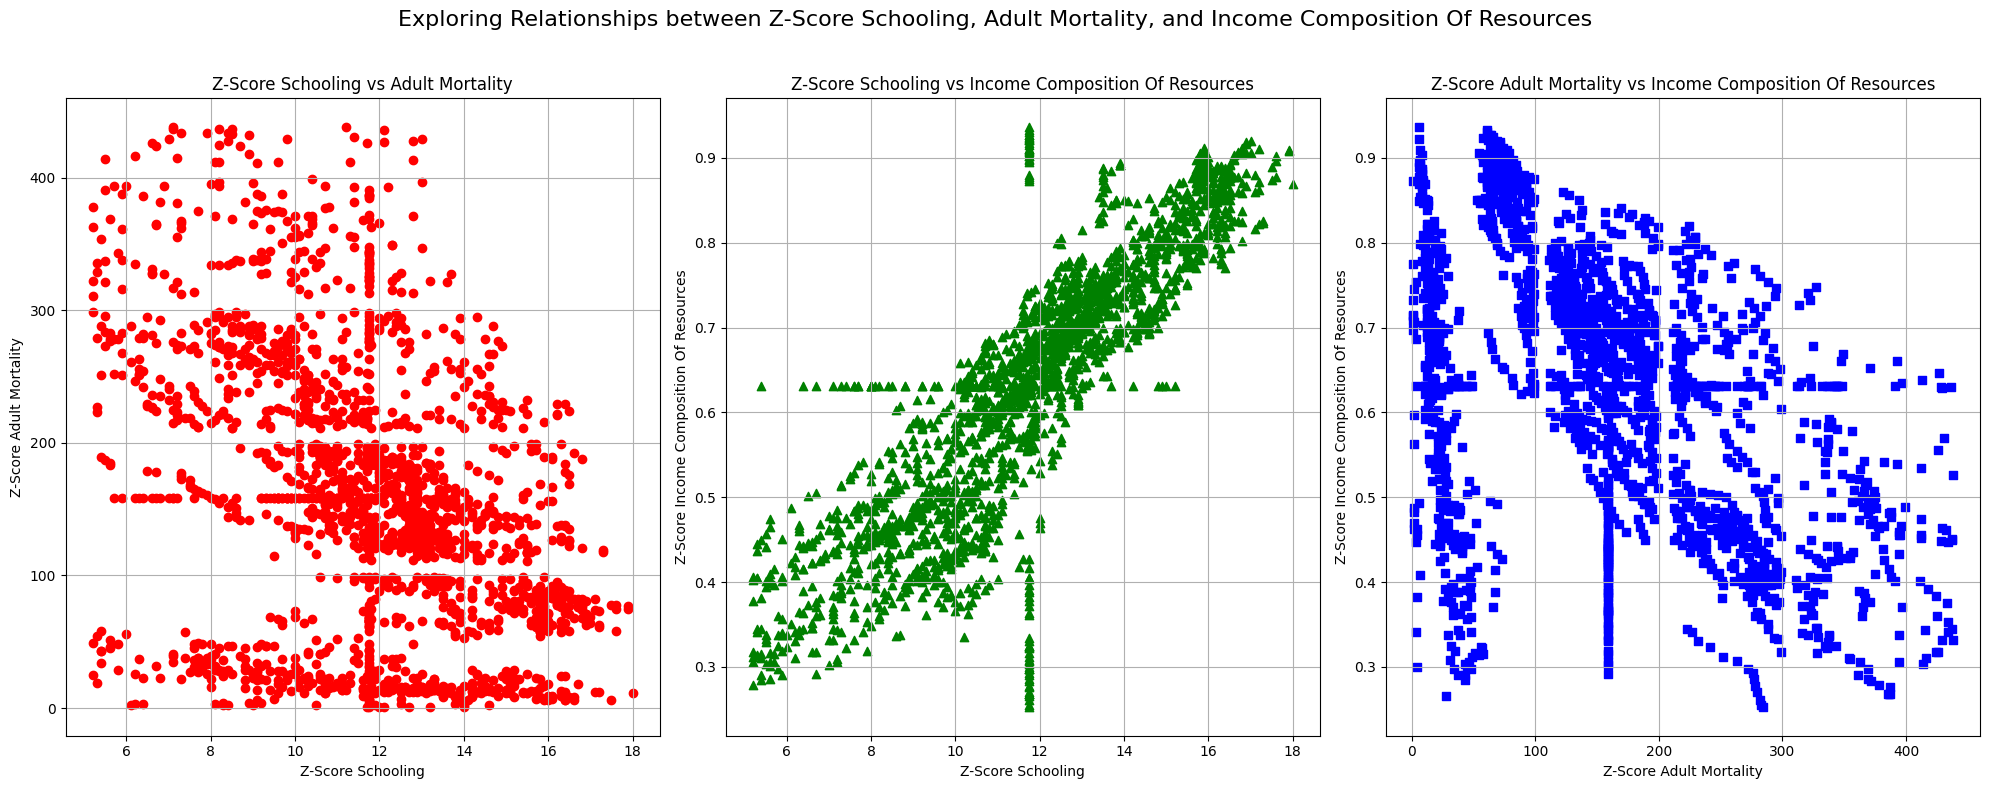

In [ ]:
plt.figure(figsize=(20, 8))

# Scatter plot 1: Z-Score Schooling vs Adult Mortality (colored in red, circles)
plt.subplot(1, 3, 1)
plt.scatter(df["Z_Score_schooling"], df["Z_Score_Adult_Mortality"], c='red', marker='o')
plt.title("Z-Score Schooling vs Adult Mortality")
plt.xlabel("Z-Score Schooling")
plt.ylabel("Z-Score Adult Mortality")
plt.grid(True)

# Scatter plot 2: Z-Score Schooling vs Income Composition Of Resources (colored in green, triangles)
plt.subplot(1, 3, 2)
plt.scatter(df["Z_Score_schooling"], df["Z_Score_Income_Composition_Of_Resources"], c='green', marker='^')
plt.title("Z-Score Schooling vs Income Composition Of Resources")
plt.xlabel("Z-Score Schooling")
plt.ylabel("Z-Score Income Composition Of Resources")
plt.grid(True)

# Scatter plot 3: Z-Score Adult Mortality vs Income Composition Of Resources (colored in blue, squares)
plt.subplot(1, 3, 3)
plt.scatter(df["Z_Score_Adult_Mortality"], df["Z_Score_Income_Composition_Of_Resources"], c='blue', marker='s')
plt.title("Z-Score Adult Mortality vs Income Composition Of Resources")
plt.xlabel("Z-Score Adult Mortality")
plt.ylabel("Z-Score Income Composition Of Resources")
plt.grid(True)

plt.suptitle("Exploring Relationships between Z-Score Schooling, Adult Mortality, and Income Composition Of Resources", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

All of these variables appear to be interrelated. Let's check this with a correlation heatmap. A correlation heatmap displays correlation coefficients as colours to visually depict the relationships between variables. Positive correlations are often shown in brighter colours, whereas negative correlations are shown in darker tones. We may learn about the strength and direction of the relationships between Z-Score Schooling, Adult Mortality, and Income Composition Of Resources by viewing the heatmap.

In [ ]:
# Correlation matrix among z-score variables
df_z_score = df.iloc[:, 21:]
df_z_score_num = df_z_score.iloc[:, :-1]
cormat = df_z_score_num.corr()

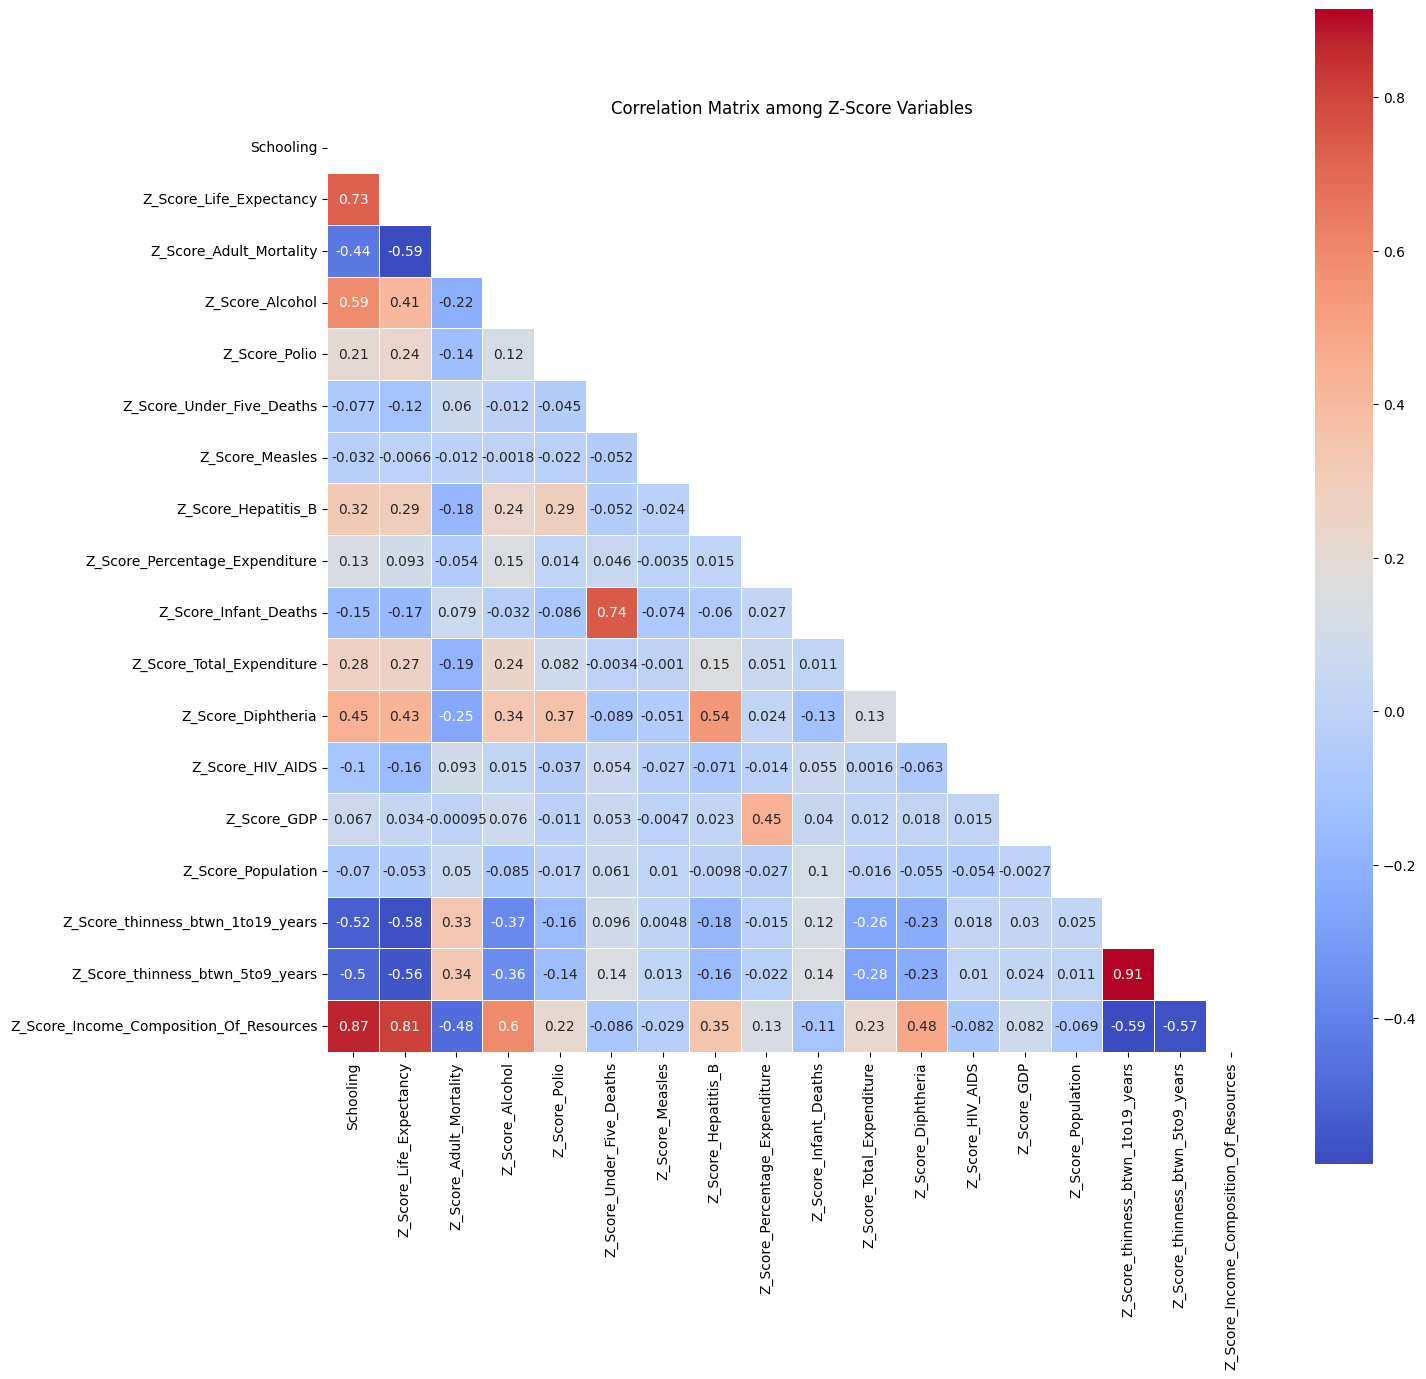

In [ ]:
# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(cormat, dtype=bool))

# Using heatmap to observe correlations
plt.figure(figsize=(15, 15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5, mask=mask, cmap='coolwarm')
plt.title("Correlation Matrix among Z-Score Variables")
plt.show()

### Observations

Z_Score_Income_Composition_Of_Resources exhibits a positive correlation with Z_Score_schooling, suggesting a potential relationship between income composition and education. Additionally, Z_Score_Thinness_btwn_1to19_Years and Z_Score_Thinness_btwn_5to9_Years display a positive correlation, indicating a connection between thinness in different age groups. Moreover, Z_Score_Polio and Z_Score_Diphtheria shows a positive correlation, emphasizing the interdependence of these two health-related variables. Similarly, Z_Score_Percentage_Expenditure and Z_Score_GDP exhibit a positive correlation, highlighting the economic aspects related to health expenditure.

Another set of correlations involves Z_Score_Income_Composition_Of_Resources, which is positively correlated with Z_Score_Life_Expectancy, underscoring the potential influence of income composition on life expectancy. Furthermore, Z_Score_Life_Expectancy shows a positive correlation with Z_Score_schooling, suggesting a connection between life expectancy and educational attainment. Z_score_Infant_Deaths and Z_Score_Under_Five_Deaths are positively correlated, indicating a correlation between deaths in different age groups. Notably, Z_Score_HIV_AIDS has a negative correlation with Z_Score_Life_Expectancy, and Z_Score_Adult_Mortality has a negative correlation with Z_Score_Life_Expectancy, pointing towards potential adverse effects on life expectancy associated with HIV prevalence and adult mortality rates.

<ipython-input-101-5e4d19ada0fa>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


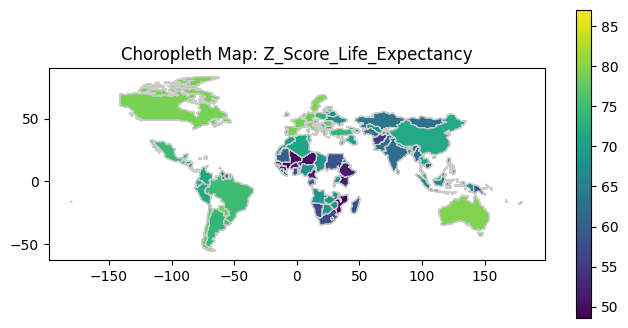

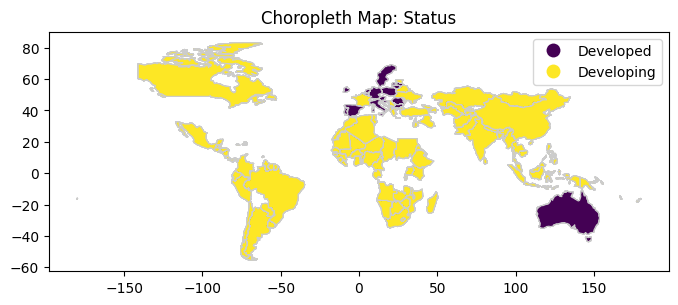

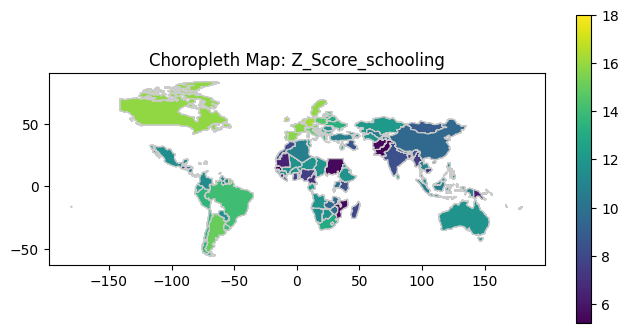

In [ ]:
# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with DataFrame based on the 'Country' column
merged_df = world.merge(df, how='left', left_on='name', right_on='Country')

# Plot the choropleth map for Z_Score_Life_Expectancy
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
merged_df.plot(column='Z_Score_Life_Expectancy', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Choropleth Map: Z_Score_Life_Expectancy')
plt.show()

# Plot the choropleth map for Status
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
merged_df.plot(column='Status', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Choropleth Map: Status')
plt.show()

# Plot the choropleth map for Z_Score_schooling
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
merged_df.plot(column='Z_Score_schooling', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Choropleth Map: Z_Score_schooling')
plt.show()

### Observation
The choropleth maps show global trends in Z-Score Life Expectancy, Status, and Z-Score Schooling across countries. The colour intensity on each map shows each country's Z-scores or category status, providing a regional perspective on these crucial metrics. Each map's colorbar serves as a reference, providing a clear scale for interpreting the data distribution. This method enables a quick and intuitive comparison of variables on a global scale.


### Final conclusion
Since it provides a quick and complete picture of correlations between several variables in a dataset, the correlation matrix heatmap is chosen over scatterplot visualisations. This visualisation conveniently condenses information, allowing for instant assessment of correlation strength and direction. The heatmap, which is especially useful for dealing with huge datasets, simplifies the interpretation of correlations by showing a symmetric matrix that displays both the strength of relationships and potential multicollinearity. This method simplifies the analytical process, making it a useful tool for preliminary exploratory data analysis.

# Machine Learning Model - Data regression

Linear regression is a statistical method that fits a linear equation to observed data to represent the connection between a dependent variable (target) and one or more independent variables (features). The underlying assumption is that a straight line can approximate the relationship between the variables. A simple linear regression model with one independent variable has the following equation:

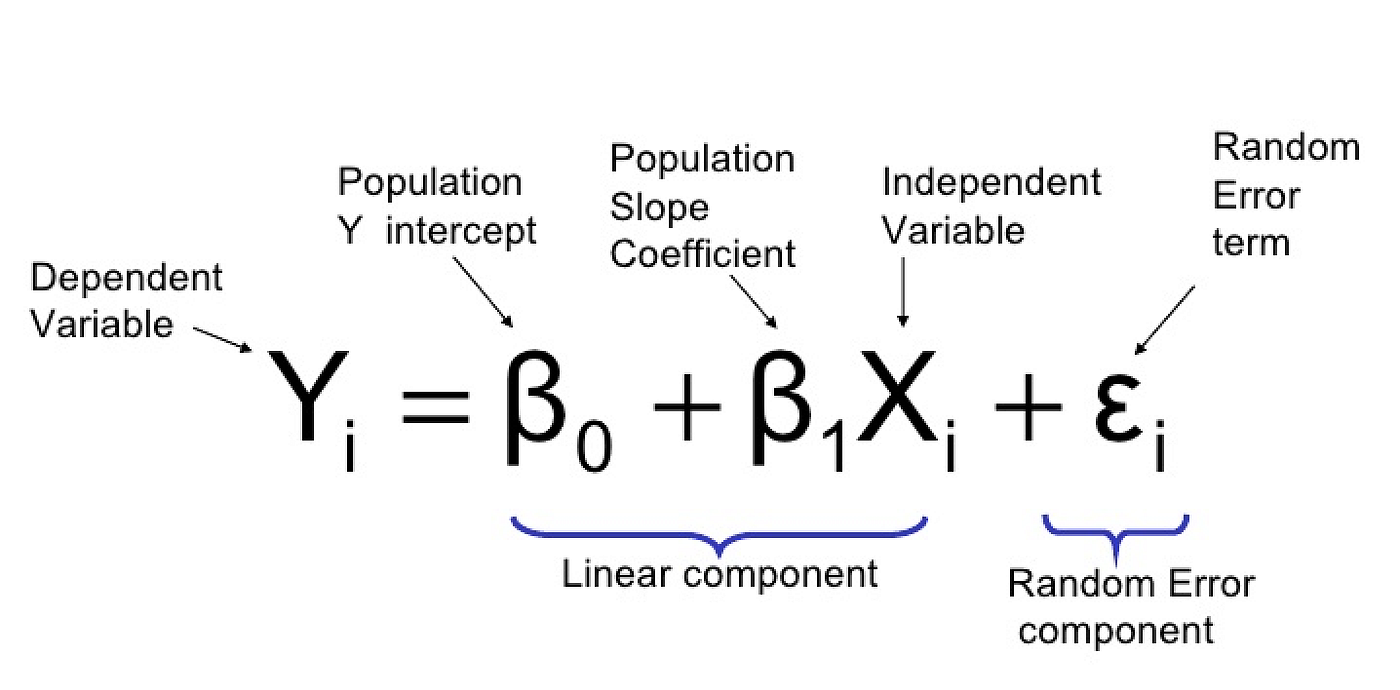

* Y is the dependent variable (target)
* X is the independent variable (feature)
* β0 is the intercept (the value of Y when X is 0)
* β1 is the slope (the change in Y for a one-unit change in X)
* ε represents the error term, accounting for unobserved factors affecting Y

In [ ]:
# Selecting relevant features
features = df[['Z_Score_Adult_Mortality',
'Z_Score_Alcohol',
'Z_Score_Polio',
'Z_Score_Under_Five_Deaths',
'Z_Score_Measles',
'Z_Score_Hepatitis_B',
'Z_Score_Percentage_Expenditure',
'Z_Score_Infant_Deaths',
'Z_Score_Total_Expenditure',
'Z_Score_Diphtheria',
'Z_Score_HIV_AIDS',
'Z_Score_GDP',
'Z_Score_thinness_btwn_1to19_years',
'Z_Score_thinness_btwn_5to9_years',
'Z_Score_Income_Composition_Of_Resources',
'Z_Score_schooling',
'BMI']]

In [ ]:
# Target variable
target = df['Z_Score_Life_Expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Select the feature for visualization
feature_for_plot = 'Z_Score_schooling'

Before we can begin to visualize the linear regression, we must ensure that there are no NaN values in our training and testing data.

In [ ]:
# Check for NaN values in features DataFrame (X_train)
nan_values_train = X_train.isna().sum()

# Check for NaN values in features DataFrame (X_test)
nan_values_test = X_test.isna().sum()

# Print the NaN values for each feature in training set
print("NaN values in training features:")
print(nan_values_train)

# Print the NaN values for each feature in testing set
print("NaN values in testing features:")
print(nan_values_test)

NaN values in training features:
Z_Score_Adult_Mortality                    0
Z_Score_Alcohol                            0
Z_Score_Polio                              0
Z_Score_Under_Five_Deaths                  0
Z_Score_Measles                            0
Z_Score_Hepatitis_B                        0
Z_Score_Percentage_Expenditure             0
Z_Score_Infant_Deaths                      0
Z_Score_Total_Expenditure                  0
Z_Score_Diphtheria                         0
Z_Score_HIV_AIDS                           0
Z_Score_GDP                                0
Z_Score_thinness_btwn_1to19_years          0
Z_Score_thinness_btwn_5to9_years           0
Z_Score_Income_Composition_Of_Resources    0
Z_Score_schooling                          0
BMI                                        0
dtype: int64
NaN values in testing features:
Z_Score_Adult_Mortality                    0
Z_Score_Alcohol                            0
Z_Score_Polio                              0
Z_Score_Under_Five_Dea

Mean Squared Error: 36.90329480879784


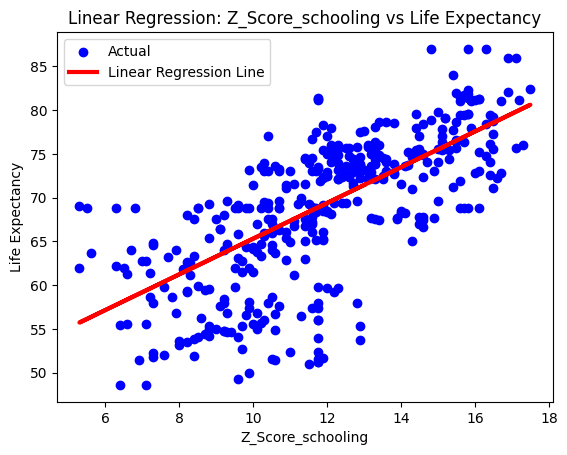

In [ ]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train[[feature_for_plot]], y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test[[feature_for_plot]])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the linear regression line along with the scatter plot
plt.scatter(X_test[feature_for_plot], y_test, color='blue', label='Actual')
plt.plot(X_test[feature_for_plot], y_pred, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel(feature_for_plot)
plt.ylabel('Life Expectancy')
plt.title(f'Linear Regression: {feature_for_plot} vs Life Expectancy')
plt.legend()
plt.show()


To determine the link between these two factors, the given code above linear regression on the variable 'Z_Score_schooling' against the variable 'Z_Score_Life_Expectancy'. The scatter plot with the linear regression line shows the relationship's trend and direction. In this scenario, the upward sloping line indicates a favourable relationship between the schooling age and life expectancy. The red line indicates the linear regression fit, which shows how changes in 'Z_Score_Schooling' affect changes in 'Z_Score_Life_Expectancy.' To evaluate the model's effectiveness, the Mean Squared Error (MSE) is generated, which provides a quantitative measure of how well the linear regression line fits the data. Overall, the visual depiction and MSE aid in assessing the strength and quality of the dataset's linear link between schooling and life expectancy. Let's take a look at two features in comparison with life expetancy below.

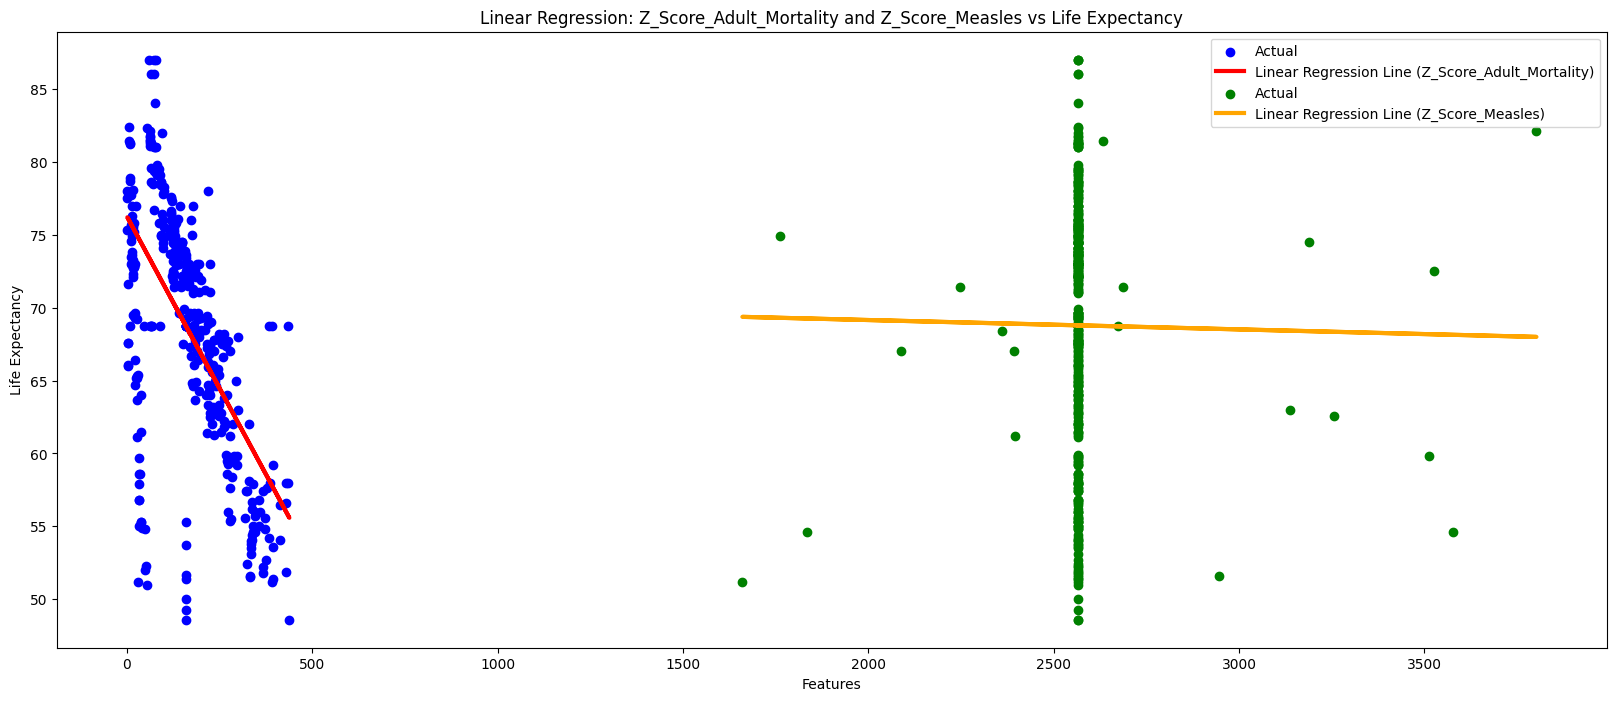

In [ ]:
# Select the features for visualization
feature_for_plot_1 = 'Z_Score_Adult_Mortality'
feature_for_plot_2 = 'Z_Score_Measles'

fig, ax = plt.subplots(figsize=(20, 8))

# Initialize linear regression models for both features
model_1 = LinearRegression()
model_2 = LinearRegression()

# Fit the models to the training data
model_1.fit(X_train[[feature_for_plot_1]], y_train)
model_2.fit(X_train[[feature_for_plot_2]], y_train)

# Predict life expectancy on the test set
y_pred_1 = model_1.predict(X_test[[feature_for_plot_1]])
y_pred_2 = model_2.predict(X_test[[feature_for_plot_2]])

# Visualize the linear regression lines along with the scatter plots
plt.scatter(X_test[feature_for_plot_1], y_test, color='blue', label='Actual')
plt.plot(X_test[feature_for_plot_1], y_pred_1, color='red', linewidth=3, label=f'Linear Regression Line ({feature_for_plot_1})')

plt.scatter(X_test[feature_for_plot_2], y_test, color='green', label='Actual')
plt.plot(X_test[feature_for_plot_2], y_pred_2, color='orange', linewidth=3, label=f'Linear Regression Line ({feature_for_plot_2})')

plt.xlabel('Features')
plt.ylabel('Life Expectancy')
plt.title(f'Linear Regression: {feature_for_plot_1} and {feature_for_plot_2} vs Life Expectancy')
plt.legend()
plt.show()


We can see that the regression line for Z_Score_Adult_Mortality slopes downward and the regression line for Z_Score_Measles almost straight in the middle. These shows that these variables and life expectancy have different connections.


For Z_Score_Adult_Mortality, a downward-sloping regression line denotes a negative relationship between adult mortality and life expectancy. In other words, as adult mortality rises, so does life expectancy. This could imply that in the provided dataset, higher levels of adult mortality have a negative impact on life expectancy.

For Z_Score_Measles, a merely straight regression line across the middle indicates a weaker or less evident correlation between Z_Score_Measles and life expectancy. It could imply that the link between measles-related conditions and life expectancy is less or less direct when compared to adult mortality. Other factors or interactions could have an impact on the impact of measles-related variables on life expectancy.

# Data Validation - cross-validation RMSE

In this code below, cv=5 indicates 5-fold cross-validation, and scoring='neg_mean_squared_error' assures that score is based on mean squared error. The code outputs the individual cross-validation RMSE values as well as the mean RMSE.

In [ ]:
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train[[feature_for_plot]], y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values and calculate mean
cv_rmse_scores = np.sqrt(-cv_scores)
mean_cv_rmse = np.mean(cv_rmse_scores)

# Print the cross-validation scores and mean RMSE
print(f'Cross-validation RMSE scores: {cv_rmse_scores}')
print(f'Mean Cross-validation RMSE: {mean_cv_rmse}')

Cross-validation RMSE scores: [5.67042885 5.75621842 6.34670735 6.16673636 6.21234501]
Mean Cross-validation RMSE: 6.030487198799564


The RMSE for each fold of cross-validation is represented by the data above.
The first fold has an RMSE of about 5.67, the second fold has an RMSE of about 5.76, the third fold has an RMSE of about 6.35, and so on.

A lower RMSE suggests that the model performs better. In my situation, the mean cross-validation RMSE is roughly 6.03, indicating that the model's predictions differ from the actual values by approximately 6.03 units on average.

# Feature Engineering

Feature engineering is a vital step in the preparation of machine learning data, involving the refinement and transformation of variables to increase model accuracy and interpretability. The goal of this part is to identify essential determinants impacting life expectancy, encode categorical variables, and align features with machine learning assumptions using normalisation and standardisation. This approach improves the dataset's appropriateness for predictive modelling

In [ ]:
round(df[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.13


In [ ]:
# Using the t-test, determine the significance of the difference in Average_Life_Expectancy between developed and developing countries
stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy'],df.loc[df['Status']=='Developing','Life_Expectancy'])

<ipython-input-109-7d6b2c2f4da6>:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy'],df.loc[df['Status']=='Developing','Life_Expectancy'])


TtestResult(statistic=23.067668005744146, pvalue=1.366065156713647e-104, df=2000.0)

The low p-value indicates strong evidence against the null hypothesis, implying that there is a statistically significant difference in average life expectancy between developed and developing countries.

Begin by making a new data frame with Life_Expectancy-related feature columns. According to the correlation heatmap, the following fields are connected with Z_Score_Life_Expectancy.

Z_Score_schooling
Z_Score_Income_Composition_Of_Resources
Z_Score_HIV_AIDS
Z_Score_Adult_Mortality

It's also worth noting that Z_Score_Income_Composition_Of_Resources is related to Z_Score_schooling. All of the features should not be interrelated, so I will remove one of them based on the correlation value with Z_Score_Life_Expectancy.

The correlation between Z_Score_Income_Composition_Of_Resources and Z_Score_Life_Expectancy is 0.81, while the association between Z_Score_Schooling and Z_Score_Life_Expectancy is 0.73.

Let us rule out Z_Score_schooling because it has a poor correlation factor. Based on the previous output, we can also select 'Status' as an important attribute.

In [ ]:
# Create a new data frame with selected features
df_features = df[['Status','Z_Score_Life_Expectancy','Z_Score_Income_Composition_Of_Resources','Z_Score_HIV_AIDS','Z_Score_Adult_Mortality']]

# Use one-time encoding to convert category values to numerical values for the 'Status' feature
feature_df = pd.concat([df_features,pd.get_dummies(df_features['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)
final.head()

,Z_Score_Life_Expectancy,Z_Score_Income_Composition_Of_Resources,Z_Score_HIV_AIDS,Z_Score_Adult_Mortality,Developing
0,65.0,0.479,1.657108,263.0,1
1,59.9,0.476,1.657108,271.0,1
2,59.9,0.470,1.657108,268.0,1
3,59.5,0.463,1.657108,272.0,1
4,59.2,0.454,1.657108,275.0,1


### Conclusion

Life expectancy, income composition, HIV/AIDS, and adult mortality were all considered during the feature engineering process. To facilitate model consistency, the 'Status' feature was encoded into numerical values (1 for 'Developing', 0 for 'Developed'). The finished DataFrame provides a full view of key properties for further investigation. A t-test was also used to compare the average life expectancy differences between developed and developing countries. The highly significant t-statistic (23.07) and very low p-value (1.37e-104) suggest a significant difference in life expectancy, emphasising the major impact of socioeconomic conditions, as represented by the 'Status' variable. These findings add to our understanding of global health disparities by emphasising the important contributions of income composition, HIV/AIDS prevalence, and adult mortality in determining life expectancy patterns across country classifications. The encoded variable 'Developing' appears as a critical explanatory component, emphasising the importance of addressing socioeconomic inequities in public health plans and policies. Furthermore, the inclusion of normalcy and rescaling transformations, such as normalisation and standardisation, adds depth to our feature engineering strategy, aligning variables with machine learning model assumptions for higher predictive performance.

# Evaluation of machine learning model

### Machine Learning Model Evaluation

The goal of this machine learning scope was to build a predictive model for life expectancy using a linear regression approach. The model was created to detect trends in a dataset containing a variety of health and socioeconomic factors, with features such as adult mortality, alcohol intake, and education deemed critical in affecting life expectancy.

### Performance Metrics and Data Integrity

The Mean Squared Error (MSE) was used to evaluate performance because of its capacity to quantify the average squared differences between expected and actual values. The first steps entailed a thorough review of NaN values in both the training and testing datasets, guaranteeing the accuracy of the data fed into the model.

### Results and Visual Representation

Predictions were extended to the test set following the successful training of the linear regression model on the training data. The visualisation, which included a scatter plot comparing actual life expectancy numbers to anticipated values, illuminated the model's performance. The fitted model was indicated by a vivid red regression line traced through the scatter plot, providing a visual assessment of its accuracy.

### Model Evaluation and Mean Squared Error

The model's quantitative evaluation was based on the Mean Squared Error, a numerical metric that represents the average squared difference between predicted and actual values. The calculated MSE, 36.90329480879784, is used to evaluate the model's precision. A lower MSE indicates a tighter match between predicted and observed values, highlighting the model's ability to capture life expectancy trends.

### Reflective Evaluation

Analysing the project's outcomes reveals insights into the complex processes of estimating life expectancy. The carefully chosen features demonstrate a deep awareness of the several elements impacting life expectancy, demonstrating a holistic approach to model design. The use of visual representations, such as the scatter plot and regression line, not only aids in model understanding but also improves the transparency of the results.

### Domain-Specific Area Contributions
The project provides significant insights into public health and socioeconomic research. The model provides actionable intelligence by unravelling the interconnection of many factors and their impact on life expectancy. These findings have the potential to inform targeted actions and policy decisions aimed at improving global health outcomes.

### Transferability and Generalization

While the focus has been on life expectancy prediction, the approaches used, from feature selection to evaluation, are transferable to comparable domain-specific domains. Changing the model's features and altering the target variable enables for the investigation of larger applicability in linked health and socioeconomic predictions.